<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Pigmentation_resized_ordered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [156]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [157]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [158]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [159]:
pwd

'/content'

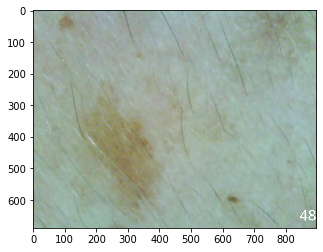

In [160]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [161]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

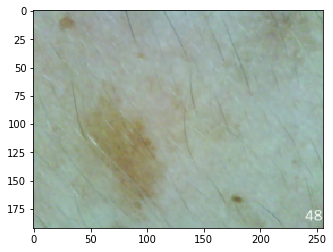

In [164]:
plt.imshow(pigment_image_resized)
plt.show()

In [165]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [167]:
import scipy
scipy.__version__

'1.0.0'

In [168]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [170]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
filenames_dict = {}
#for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    #for filename in filenames:
        #if re.search('d*.PNG', filename):
            #filepath = os.path.join(root, filename)
            #pig = ndimage.imread(filepath)
            #pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            #pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
#pigs = np.array(pigs)

for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    #print(filenames)
    for filename in filenames:
            #print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict.update({int(n.group()): os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  image = skimage.transform.resize(image, (192,256,3))  #redo this size or re-size later in Tensorflow
  
  pigs+= [image]
  
  
pigs = np.array(pigs)
            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


In [0]:
pigs = np.asarray(pigs)

In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [0]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
filenames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
           
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [0]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [176]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [178]:
images.shape

(2594, 192, 256, 3)

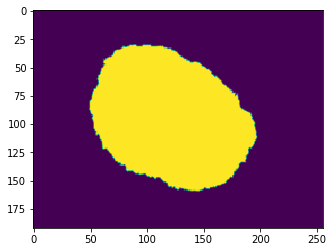

In [179]:
plt.imshow(segs[10])

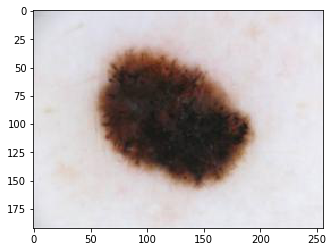

In [180]:
plt.imshow(images[10])

[[[0.17647059 0.15294118 0.2       ]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.23137255 0.22745098 0.28235294]
  [0.24313725 0.23529412 0.29019608]
  [0.25098039 0.24313725 0.29803922]]

 [[0.17254902 0.14901961 0.19607843]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.24313725 0.23921569 0.29411765]
  [0.2627451  0.25490196 0.30980392]
  [0.2745098  0.26666667 0.32156863]]

 [[0.16862745 0.14509804 0.19215686]
  [0.16862745 0.15686275 0.19215686]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.25098039 0.25098039 0.29803922]
  [0.27058824 0.2627451  0.31764706]
  [0.28235294 0.2745098  0.32941176]]

 ...

 [[0.34117647 0.31764706 0.3254902 ]
  [0.40784314 0.38431373 0.39215686]
  [0.49411765 0.47058824 0.47843137]
  ...
  [0.45882353 0.43529412 0.45098039]
  [0.41960784 0.39607843 0.41176471]
  [0.38431373 0.36078431 0.37647059]]

 [[0.29411765 0.27058824 0.27843137]
  [0.37254902 0.34901961 0.35686275]


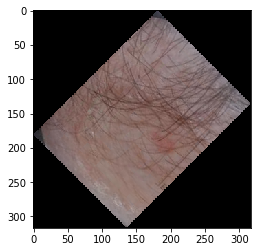

In [181]:
image = images[2580,:,:,:]/255
print(image)
rotate_image = ndimage.rotate(image, 45)
#rotate_image = misc.imresize(rotate_image, (192,256,6))
print(rotate_image)
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

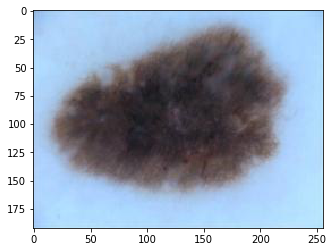

In [182]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [184]:
trainim.shape

(2464, 192, 256, 3)

In [185]:
np.max(testlab)

255

In [186]:
testlab.shape

(130, 192, 256)

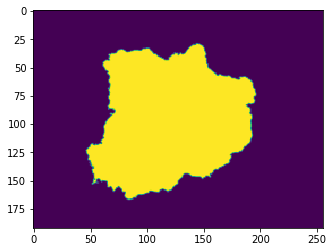

In [187]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

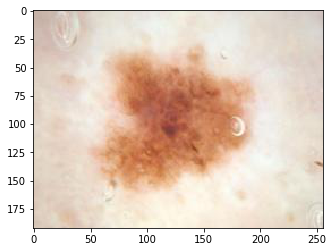

In [188]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
def data_augmentations(features,lables,flag):
  if flag:
    #print("treat the first input image")
    #hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
    #plt.imshow(features[0])
    #plt.show()
    #plt.imshow(hsv_img)
    #plt.show()
    #print(hsv_img.dtype)
    #print(features[0].dtype)
    #print(hsv_img)
    #print(features[0])
    #l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
    #image = np.concatenate((features[0]/255,hsv_img,l), axis =2)  #concatenate into one big image
    x2 = features[0].reshape([1,192,256,3]) #image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
    image = features[0]
    #print("#flip the first image:")
    flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
    #plt.imshow(flip_ud_x2[0,:,:,:3])
   
    #plt.show()
    x2 = np.vstack((x2, flip_ud_x2)) 
    
    #print("#rotate the first image by a random angle")
    ra = np.random.random()*360
    rotate_x2 = ndimage.rotate(image, ra)
    #print(image)
    #print(rotate_x2)
    #plt.imshow(rotate_x2[:,:,:3])
    #plt.show()
    #print("test1")
    rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
    #plt.imshow(rotate_x2[0,:,:,:3])
    #print("test2")
    x2 = np.vstack((x2, rotate_x2 )) 
    
    #print("#treat the first label:")
    label = lables[0]
    #plt.imshow(label)
    #plt.show()
    y2 = label.reshape([1,192,256,1])
    #print("#flip the first label to match the first input image:")
    flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
    y2 = np.vstack((y2, flip_ud_y2)) 
    #plt.imshow(flip_ud_y2[0:,:,:,:])
    #plt.show()
    #print("#rotate the label by the same angle as the image")
    rotate_y2 = ndimage.rotate(label, ra)
    rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
    y2 = np.vstack((y2, rotate_y2)) 
    #plt.imshow(rotate_y2) 
    #plt.show()
  
    i = 1
    
    #print('#treat the subsequent images and labels')
    for image in features[1:]:
      #print(i)
      #plt.imshow(image)
      #plt.show()
      #hsv_img = rgb2hsv(image)  #add 3 hsv channels       
      #plt.imshow(hsv_img)
      #plt.show()
      #l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
      #image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
      image2 = image.reshape([1,192,256,3])  #need to add "1" to first dimension for future concatenation
      
      x2 = np.vstack((x2, image2))
      #print('#flip the image:')
      flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
      x2 = np.vstack((x2, flip_ud_x2))
      #plt.imshow(flip_ud_x2[1,:,:,:3])
      #plt.show()
     
      #print('#rotate the image by a random angle')
      ra = np.random.random()*360
      rotate_x2 = ndimage.rotate(image, ra)
      rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
      x2 = np.vstack((x2, rotate_x2))
      #plt.imshow(rotate_x2[0,:,:,:3])
      #plt.show()
      
     
      #print('#treat the corresponding label:')
      label = lables[i]
      label2 = lables[i].reshape([1,192,256,1])
      #plt.imshow(label)
      #plt.show()
     
      y2 = np.vstack((y2,label2))
      #print('#flip the corresponding label to match the input image:')
      flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
      y2 = np.vstack((y2,flip_ud_y2))
      #plt.imshow(flip_ud_y2[0,:,:,:])
      #plt.show()
      
      
      #print('#rotate the label by the same angle as the image')
      rotate_y2 = ndimage.rotate(label, ra)
      rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
      y2 = np.vstack((y2,rotate_y2))
      #plt.imshow(rotate_y2) 
      #plt.show()
      
      #print('#scale images to 0-1 interval')
    x2 = x2/255
    y2 = y2/255
  else:
     x2 = features/255
     y2 = lables/255
  return x2, y2
    
  

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [200]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

In [205]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [207]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [209]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

In [211]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [213]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [216]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

(?, 24, 32, 256)


In [217]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [218]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [219]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [220]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [221]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

Session

In [227]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [228]:
tf.math.exp(1.)

<tf.Tensor 'Exp_1:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  0.8649460000001454 

Avg Jacc is:


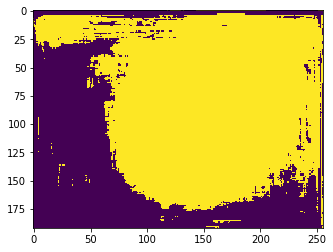

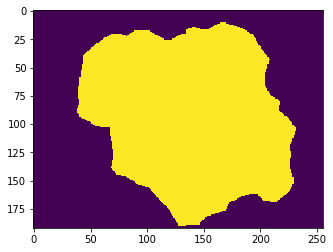

0.0918607785151555  step number is  0  batch_size is  16
Currently on step 100
the time is  12.454846000000089 

Avg Jacc is:


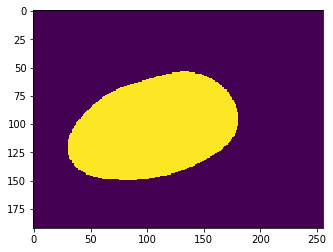

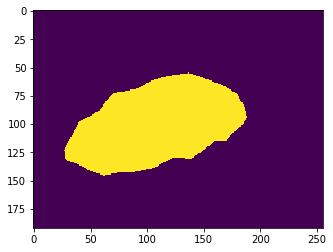

0.5898151104266827  step number is  100  batch_size is  16
Currently on step 200
the time is  24.01579099999981 

Avg Jacc is:


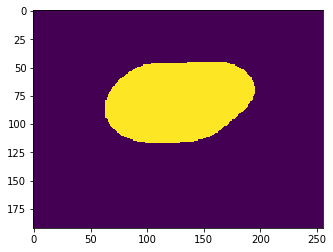

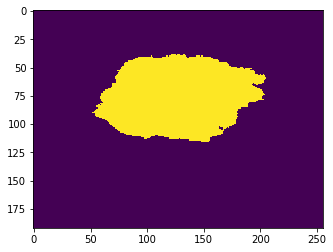

0.6415890033428485  step number is  200  batch_size is  16
Currently on step 300
the time is  35.51676700000007 

Avg Jacc is:


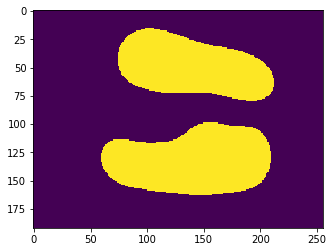

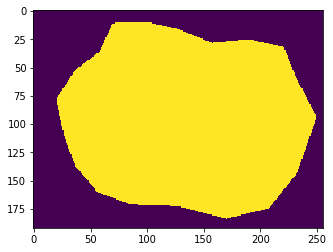

0.6029545710637019  step number is  300  batch_size is  16
Currently on step 400
the time is  47.131272999999965 

Avg Jacc is:


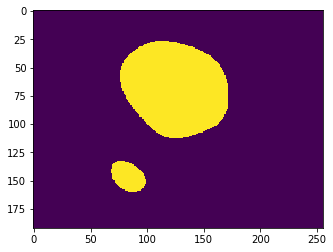

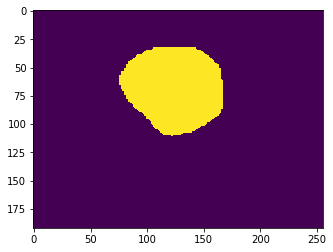

0.6898543724646935  step number is  400  batch_size is  16
Currently on step 500
the time is  58.631331000000046 

Avg Jacc is:


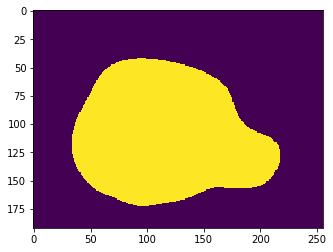

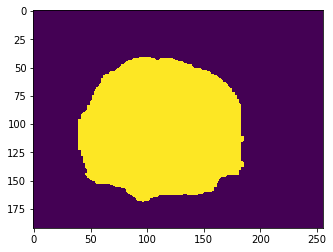

0.6872634887695312  step number is  500  batch_size is  16
Currently on step 600
the time is  70.26087800000005 

Avg Jacc is:


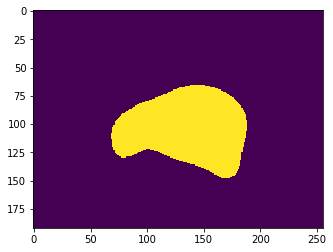

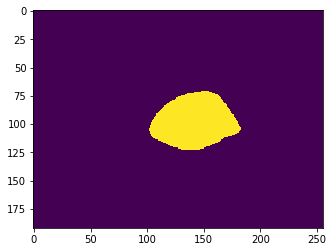

0.6690213716947115  step number is  600  batch_size is  16
Currently on step 700
the time is  81.88155700000016 

Avg Jacc is:


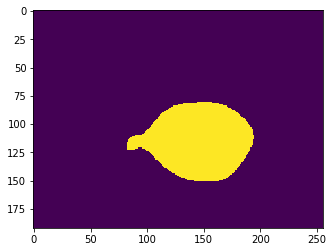

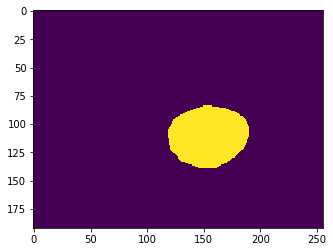

0.677911142202524  step number is  700  batch_size is  16
Currently on step 800
the time is  93.63289399999985 

Avg Jacc is:


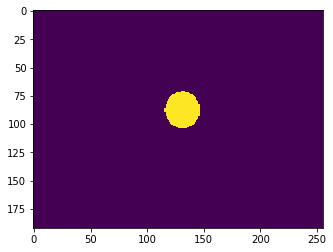

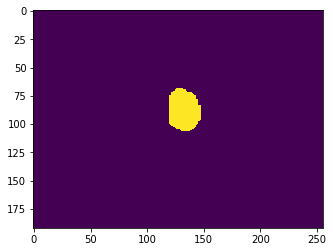

0.7247499906099759  step number is  800  batch_size is  16
Currently on step 900
the time is  105.29650700000002 

Avg Jacc is:


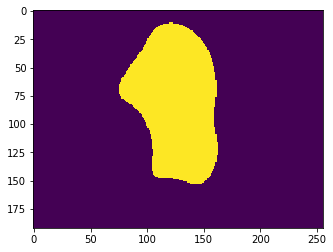

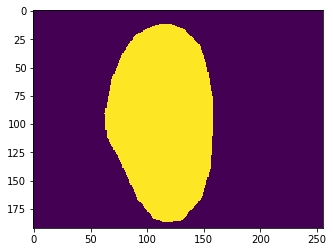

0.7106732295109676  step number is  900  batch_size is  16
Currently on step 1000
the time is  117.02686200000016 

Avg Jacc is:


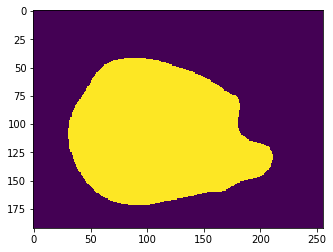

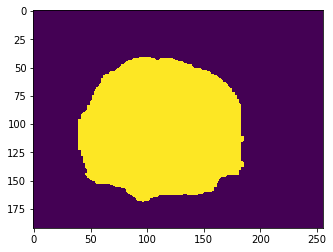

0.7411108750563401  step number is  1000  batch_size is  16
Currently on step 1100
the time is  128.74298199999976 

Avg Jacc is:


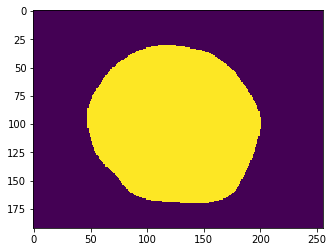

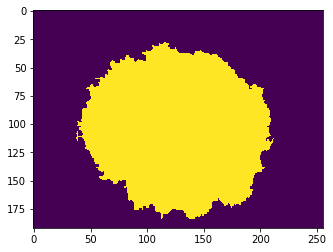

0.7349827693058895  step number is  1100  batch_size is  16
Currently on step 1200
the time is  140.71668099999988 

Avg Jacc is:


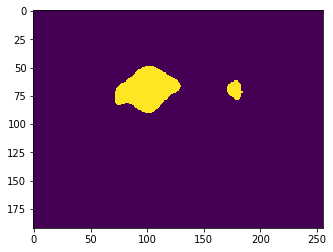

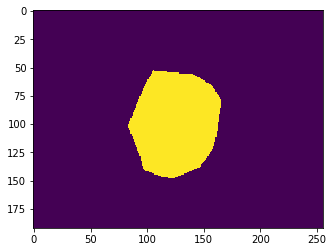

0.7272982083834134  step number is  1200  batch_size is  16
Currently on step 1300
the time is  152.4415439999998 

Avg Jacc is:


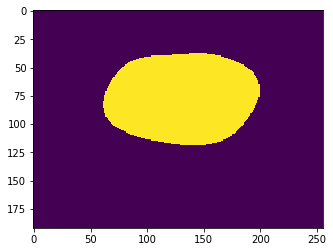

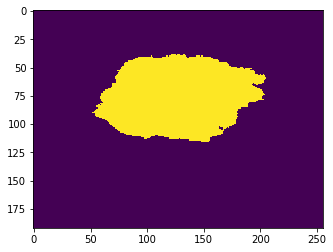

0.7316741356482872  step number is  1300  batch_size is  16
Currently on step 1400
the time is  164.13008899999977 

Avg Jacc is:


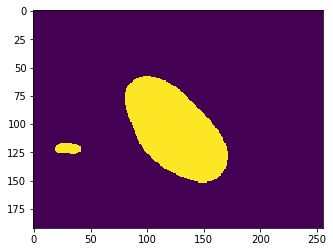

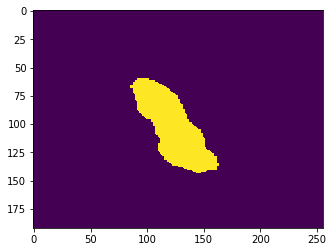

0.7339827317457933  step number is  1400  batch_size is  16
Currently on step 1500
the time is  175.8444159999999 

Avg Jacc is:


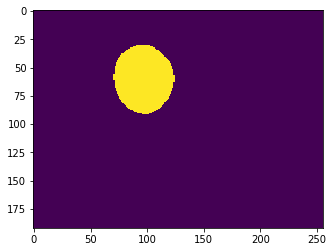

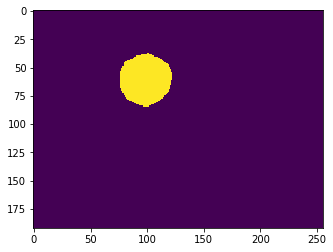

0.7307976355919471  step number is  1500  batch_size is  16
Currently on step 1600
the time is  187.52263600000015 

Avg Jacc is:


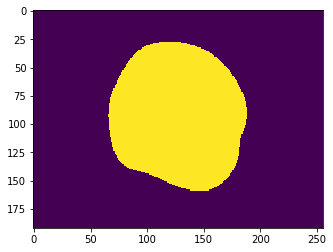

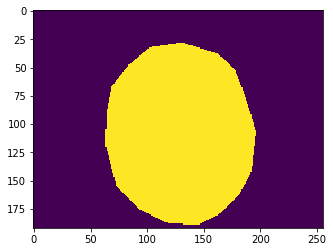

0.734048579289363  step number is  1600  batch_size is  16
Currently on step 1700
the time is  199.24623599999995 

Avg Jacc is:


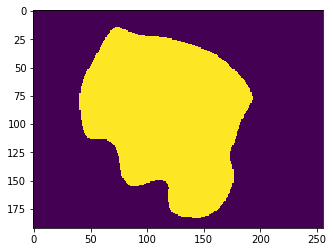

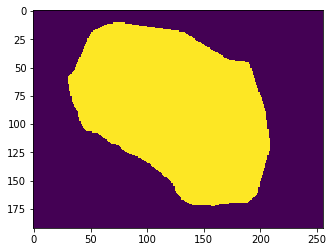

0.7344839242788461  step number is  1700  batch_size is  16
Currently on step 1800
the time is  210.9371729999998 

Avg Jacc is:


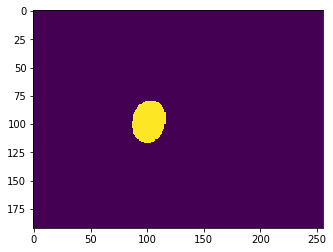

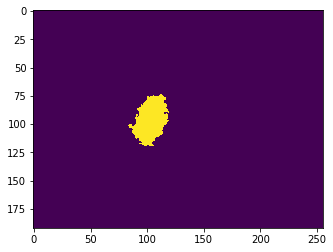

0.7548383272611178  step number is  1800  batch_size is  16
Currently on step 1900
the time is  222.700648 

Avg Jacc is:


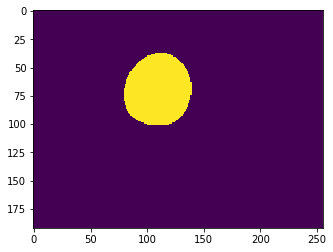

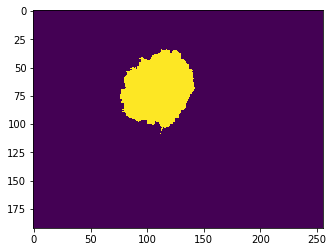

0.7626906174879807  step number is  1900  batch_size is  16
Currently on step 2000
the time is  234.3952629999999 

Avg Jacc is:


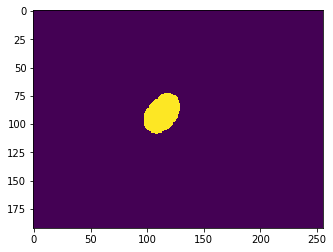

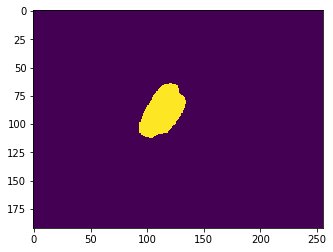

0.7434865511380709  step number is  2000  batch_size is  16
Currently on step 2100
the time is  246.06359500000008 

Avg Jacc is:


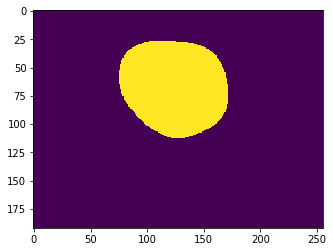

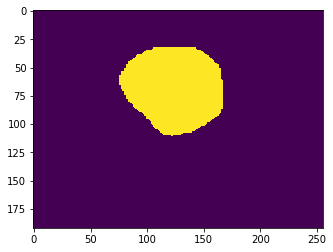

0.7549481905423678  step number is  2100  batch_size is  16
Currently on step 2200
the time is  257.8282089999998 

Avg Jacc is:


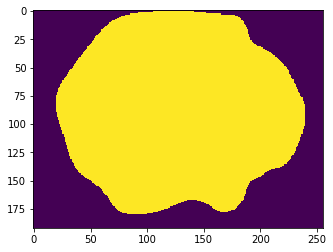

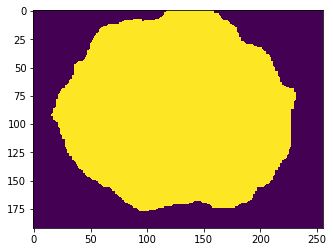

0.7470858060396635  step number is  2200  batch_size is  16
Currently on step 2300
the time is  269.55658399999993 

Avg Jacc is:


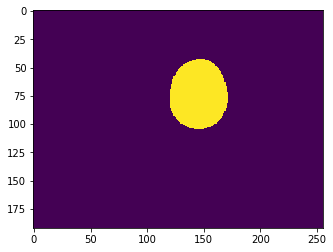

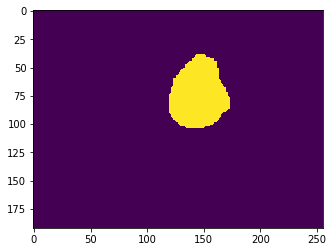

0.7405902569110577  step number is  2300  batch_size is  16
Currently on step 2400
the time is  281.26983100000007 

Avg Jacc is:


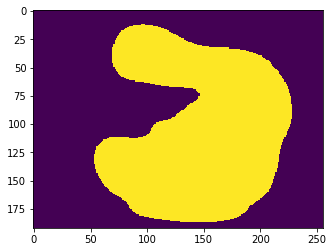

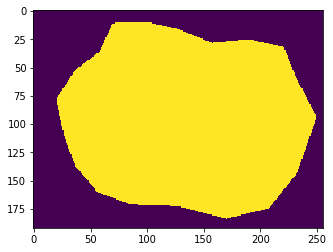

0.7443765493539664  step number is  2400  batch_size is  16
Currently on step 2500
the time is  292.8988439999998 

Avg Jacc is:


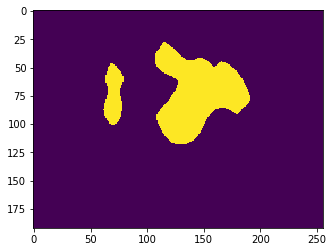

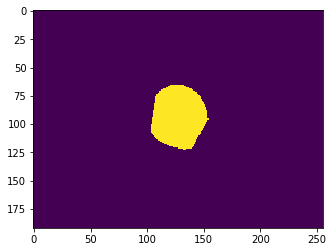

0.7465252216045674  step number is  2500  batch_size is  16
Currently on step 2600
the time is  304.5012849999998 

Avg Jacc is:


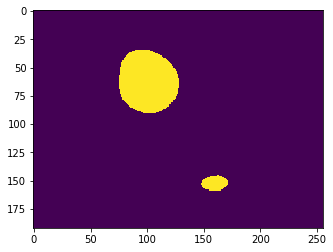

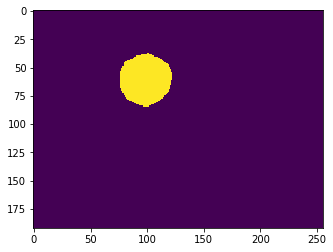

0.7358237633338341  step number is  2600  batch_size is  16
Currently on step 2700
the time is  316.1972350000001 

Avg Jacc is:


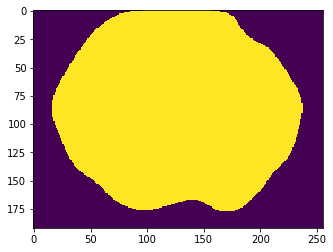

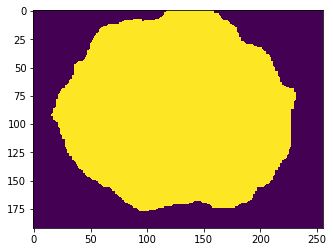

0.743451397235577  step number is  2700  batch_size is  16
Currently on step 2800
the time is  327.98659199999975 

Avg Jacc is:


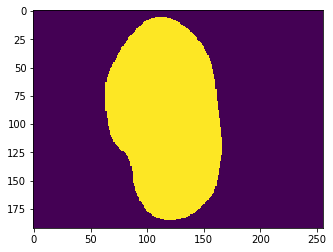

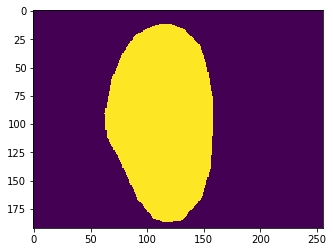

0.770210442176232  step number is  2800  batch_size is  16
Currently on step 2900
the time is  339.6909649999998 

Avg Jacc is:


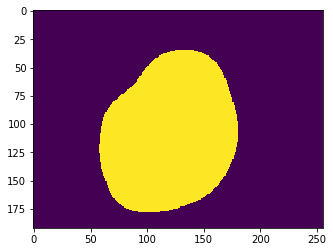

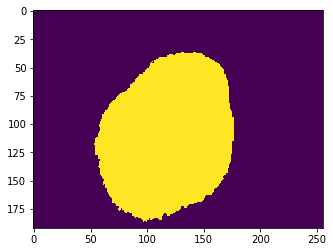

0.7161460289588342  step number is  2900  batch_size is  16
Currently on step 3000
the time is  351.3802289999999 

Avg Jacc is:


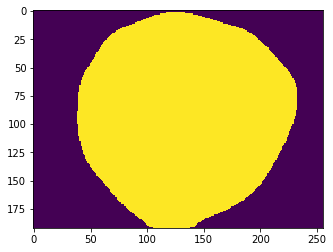

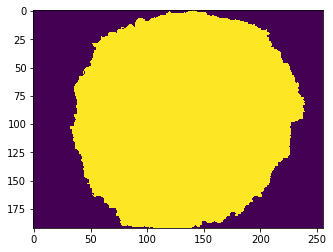

0.7345920269305889  step number is  3000  batch_size is  16
Currently on step 3100
the time is  363.0531639999999 

Avg Jacc is:


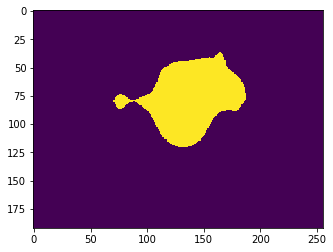

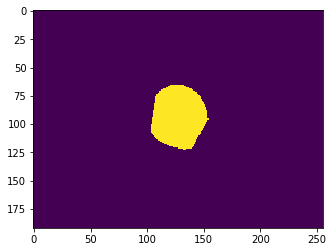

0.7631171593299279  step number is  3100  batch_size is  16
Currently on step 3200
the time is  374.79126399999996 

Avg Jacc is:


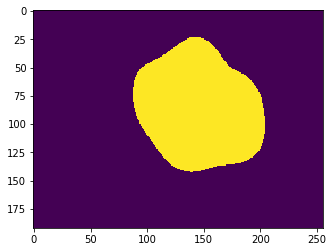

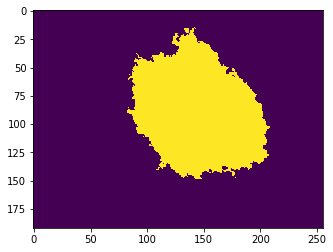

0.7422245905949519  step number is  3200  batch_size is  16
Currently on step 3300
the time is  386.6363769999998 

Avg Jacc is:


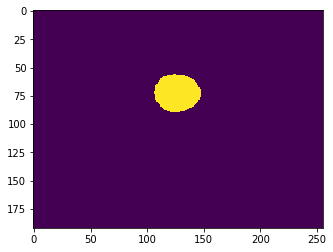

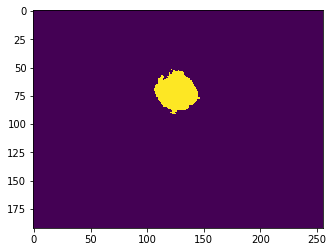

0.7637843792255108  step number is  3300  batch_size is  16
Currently on step 3400
the time is  398.32450900000003 

Avg Jacc is:


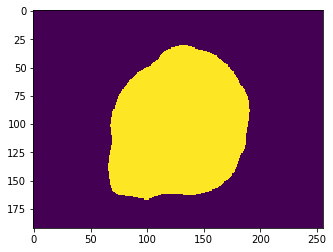

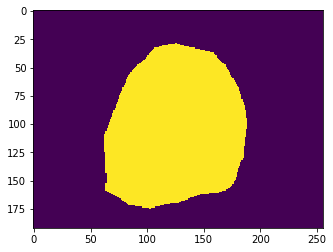

0.7654807457557091  step number is  3400  batch_size is  16
Currently on step 3500
the time is  410.0091910000001 

Avg Jacc is:


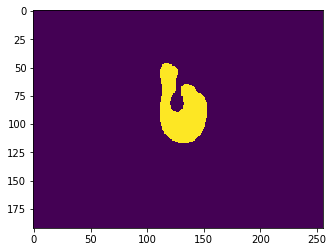

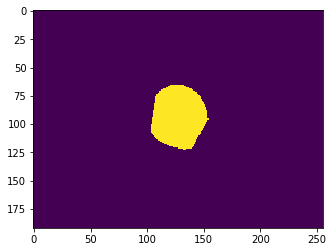

0.752657963679387  step number is  3500  batch_size is  16
Currently on step 3600
the time is  421.9635159999998 

Avg Jacc is:


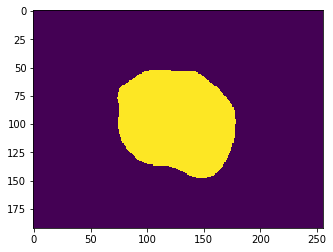

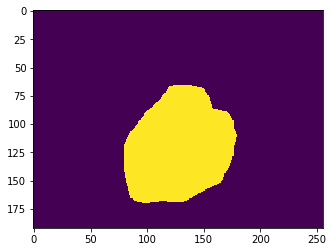

0.758444565993089  step number is  3600  batch_size is  16
Currently on step 3700
the time is  433.74893999999995 

Avg Jacc is:


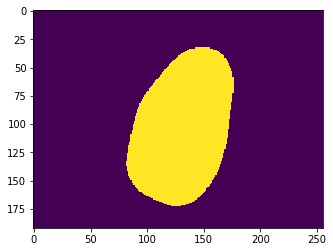

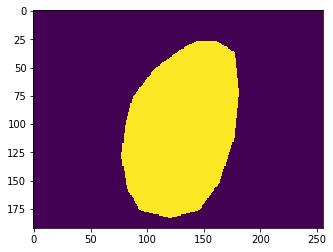

0.7780145498422476  step number is  3700  batch_size is  16
Currently on step 3800
the time is  445.37957400000005 

Avg Jacc is:


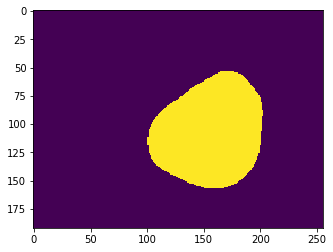

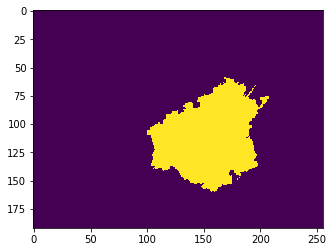

0.7616770230806791  step number is  3800  batch_size is  16
Currently on step 3900
the time is  457.0269909999997 

Avg Jacc is:


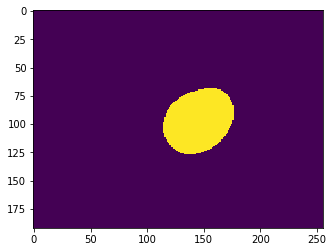

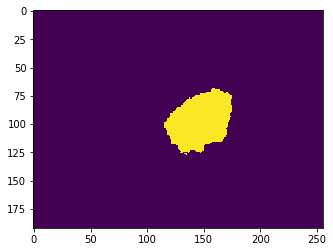

0.773495600773738  step number is  3900  batch_size is  16
Currently on step 4000
the time is  468.656704 

Avg Jacc is:


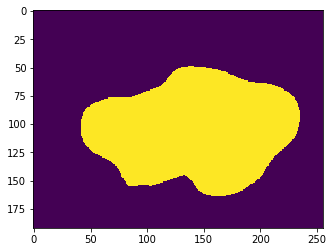

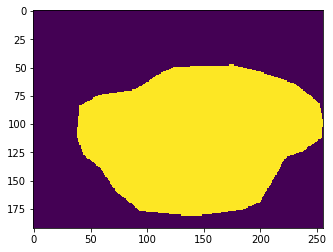

0.7455468984750601  step number is  4000  batch_size is  16
Currently on step 4100
the time is  480.38192200000003 

Avg Jacc is:


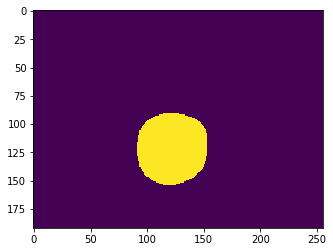

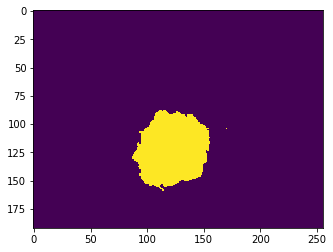

0.7617252056415265  step number is  4100  batch_size is  16
Currently on step 4200
the time is  492.03941399999985 

Avg Jacc is:


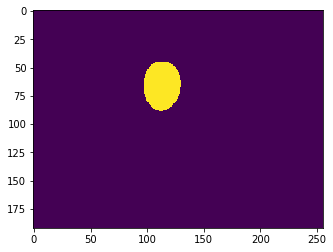

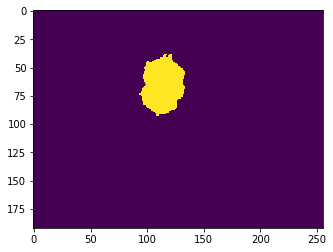

0.7554511437049278  step number is  4200  batch_size is  16
Currently on step 4300
the time is  503.75750800000014 

Avg Jacc is:


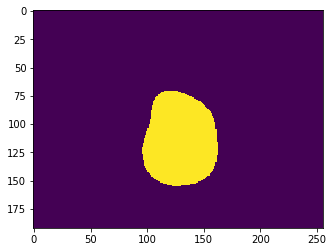

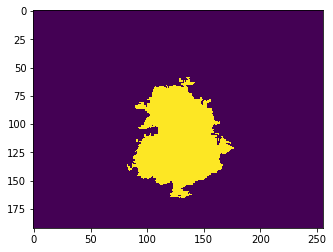

0.7661430945763221  step number is  4300  batch_size is  16
Currently on step 4400
the time is  515.4148439999999 

Avg Jacc is:


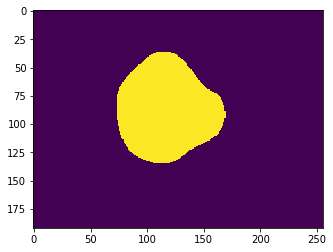

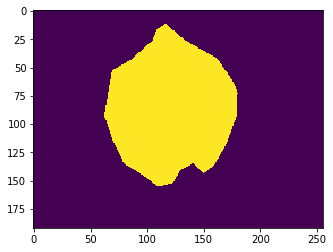

0.7603516798753005  step number is  4400  batch_size is  16
Currently on step 4500
the time is  527.159932 

Avg Jacc is:


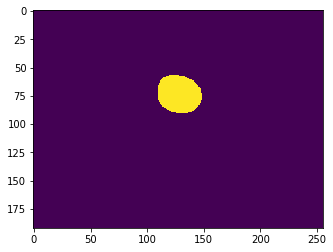

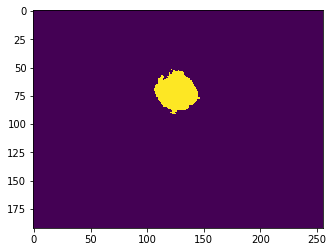

0.7737940861628606  step number is  4500  batch_size is  16
Currently on step 4600
the time is  538.8416779999998 

Avg Jacc is:


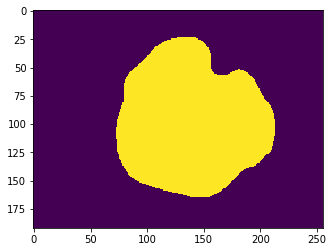

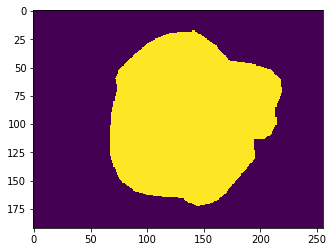

0.6959072993351862  step number is  4600  batch_size is  16
Currently on step 4700
the time is  550.5776209999999 

Avg Jacc is:


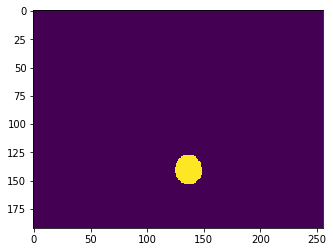

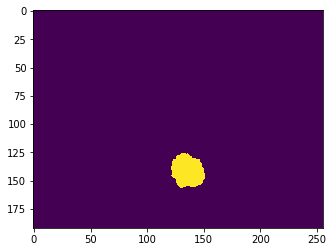

0.7669120788574219  step number is  4700  batch_size is  16
Currently on step 4800
the time is  562.2947209999998 

Avg Jacc is:


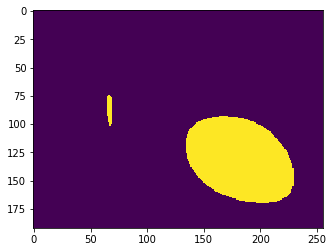

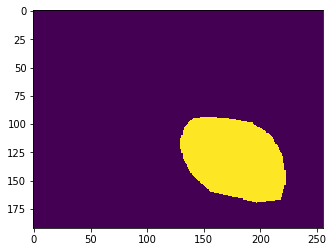

0.7840006901667669  step number is  4800  batch_size is  16
Currently on step 4900
the time is  574.0016169999999 

Avg Jacc is:


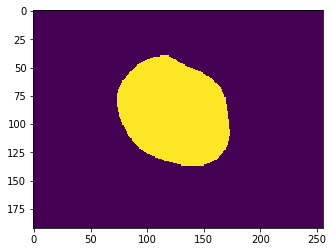

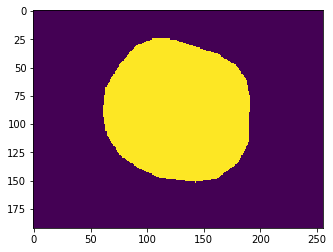

0.7771071213942308  step number is  4900  batch_size is  16
Currently on step 5000
the time is  585.729155 

Avg Jacc is:


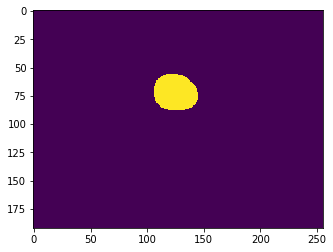

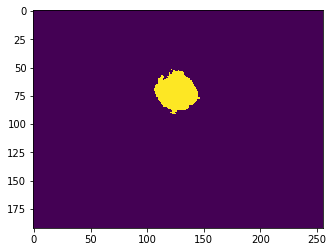

0.7742371192345252  step number is  5000  batch_size is  16
Currently on step 5100
the time is  597.425596 

Avg Jacc is:


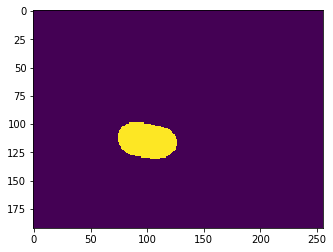

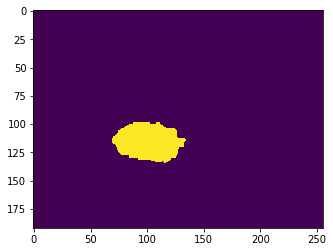

0.7814930255596454  step number is  5100  batch_size is  16
Currently on step 5200
the time is  609.1347839999999 

Avg Jacc is:


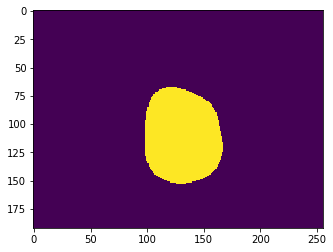

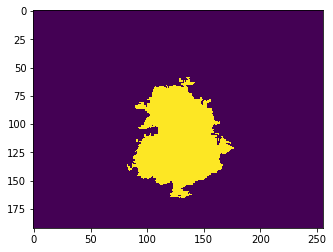

0.7757746182955229  step number is  5200  batch_size is  16
Currently on step 5300
the time is  620.964285 

Avg Jacc is:


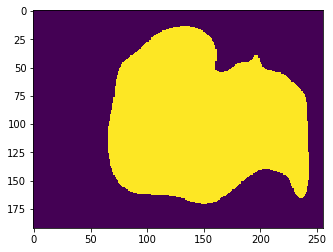

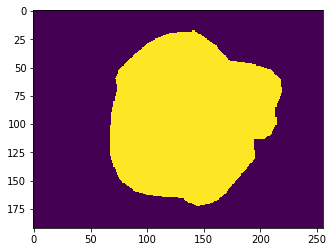

0.7655057466947115  step number is  5300  batch_size is  16
Currently on step 5400
the time is  632.6360380000001 

Avg Jacc is:


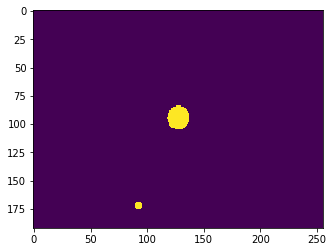

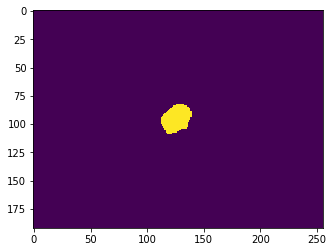

0.7751180795522836  step number is  5400  batch_size is  16
Currently on step 5500
the time is  644.373345 

Avg Jacc is:


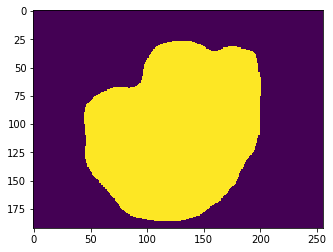

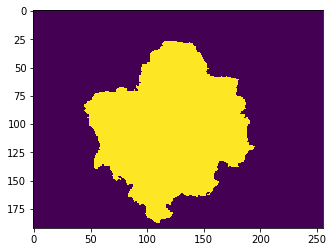

0.7891492403470552  step number is  5500  batch_size is  16
Currently on step 5600
the time is  656.1643020000001 

Avg Jacc is:


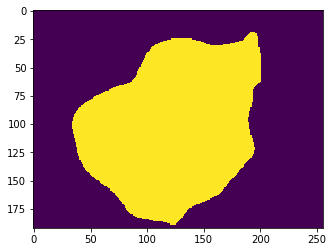

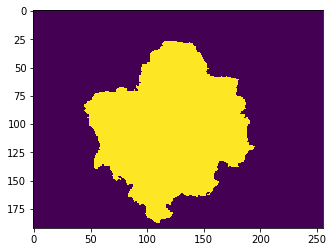

0.7767242431640625  step number is  5600  batch_size is  16
Currently on step 5700
the time is  667.855258 

Avg Jacc is:


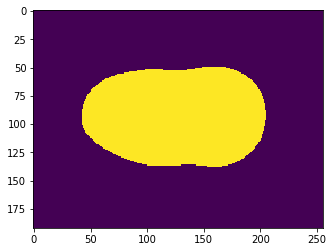

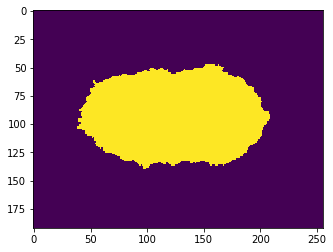

0.7717170715332031  step number is  5700  batch_size is  16
Currently on step 5800
the time is  679.61688 

Avg Jacc is:


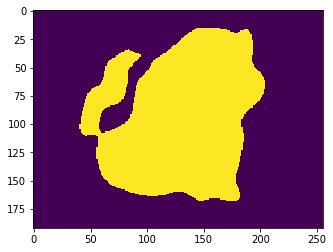

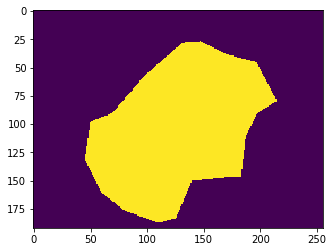

0.7856689453125  step number is  5800  batch_size is  16
Currently on step 5900
the time is  691.3416109999998 

Avg Jacc is:


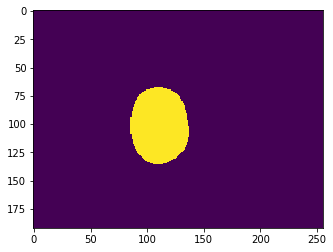

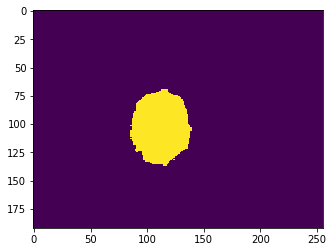

0.7770152165339543  step number is  5900  batch_size is  16
Currently on step 6000
the time is  703.319755 

Avg Jacc is:


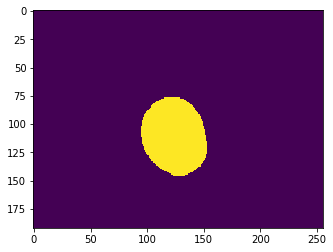

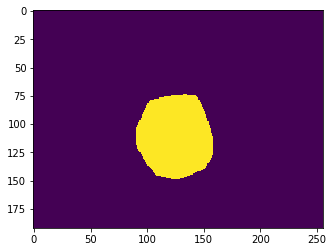

0.7608600323016826  step number is  6000  batch_size is  16
Currently on step 6100
the time is  715.0921199999998 

Avg Jacc is:


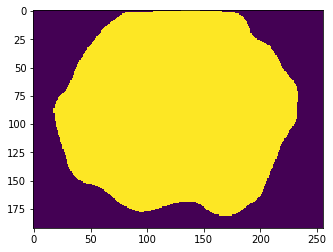

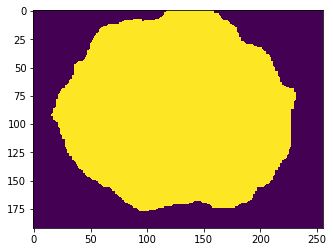

0.7786216148963341  step number is  6100  batch_size is  16
Currently on step 6200
the time is  726.8280070000001 

Avg Jacc is:


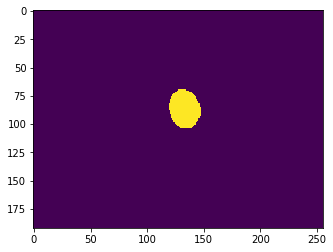

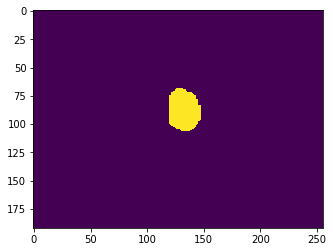

0.7700228177584134  step number is  6200  batch_size is  16
Currently on step 6300
the time is  738.5431479999997 

Avg Jacc is:


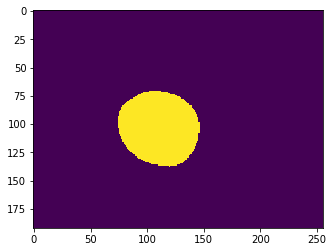

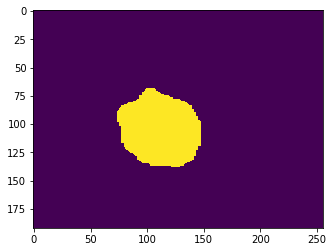

0.7496167696439303  step number is  6300  batch_size is  16
Currently on step 6400
the time is  750.3869879999997 

Avg Jacc is:


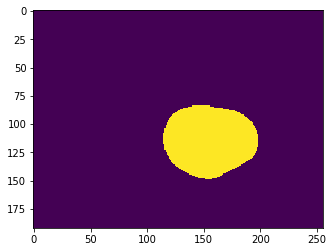

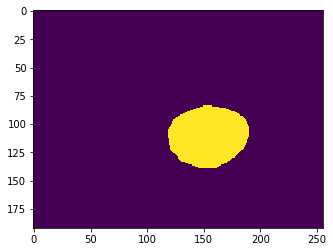

0.7771267230694111  step number is  6400  batch_size is  16
Currently on step 6500
the time is  762.2112689999999 

Avg Jacc is:


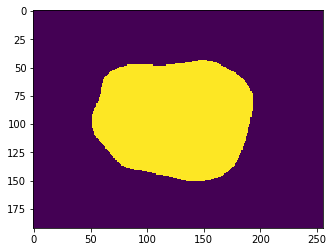

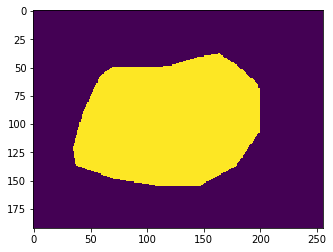

0.7639779897836538  step number is  6500  batch_size is  16
Currently on step 6600
the time is  774.022571 

Avg Jacc is:


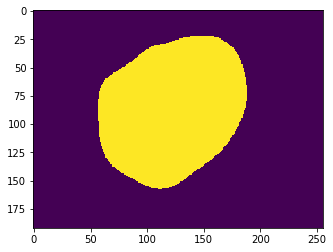

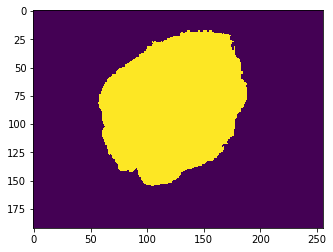

0.7770936232346755  step number is  6600  batch_size is  16
Currently on step 6700
the time is  785.8067999999998 

Avg Jacc is:


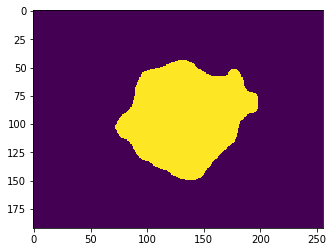

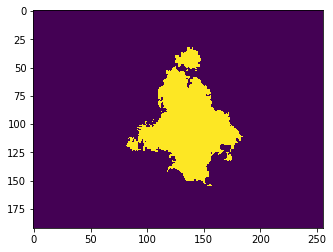

0.7602789658766527  step number is  6700  batch_size is  16
Currently on step 6800
the time is  797.6265020000001 

Avg Jacc is:


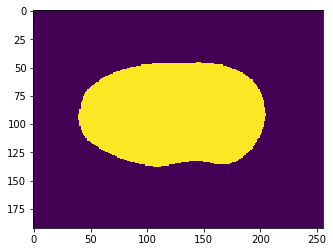

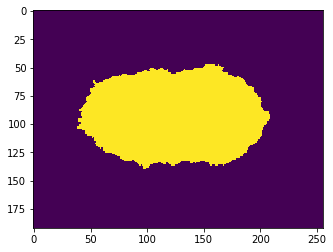

0.7926367539625901  step number is  6800  batch_size is  16
Currently on step 6900
the time is  809.4397610000001 

Avg Jacc is:


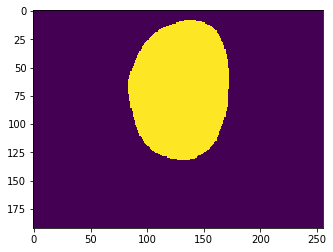

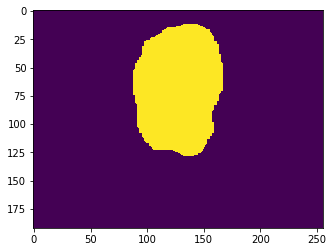

0.7663549569936899  step number is  6900  batch_size is  16
Currently on step 7000
the time is  821.2537389999998 

Avg Jacc is:


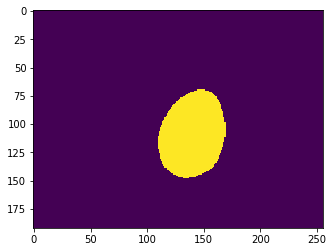

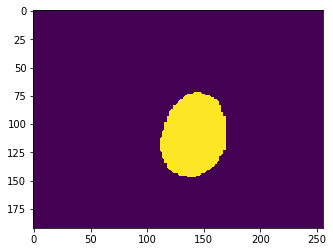

0.7669869056114784  step number is  7000  batch_size is  16
Currently on step 7100
the time is  833.0327419999999 

Avg Jacc is:


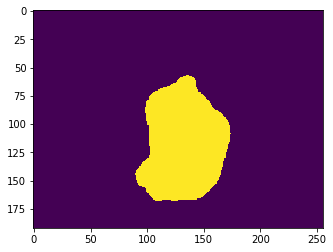

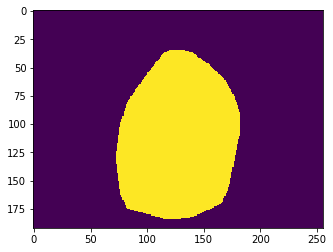

0.7743385901817909  step number is  7100  batch_size is  16
Currently on step 7200
the time is  844.8512809999997 

Avg Jacc is:


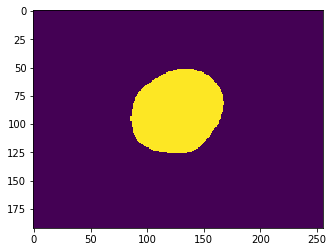

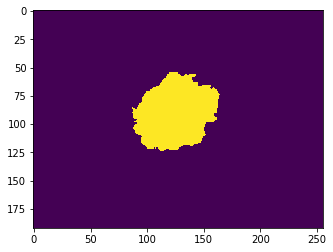

0.7610708383413461  step number is  7200  batch_size is  16
Currently on step 7300
the time is  856.567102 

Avg Jacc is:


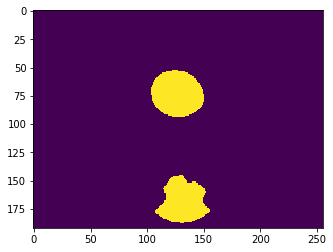

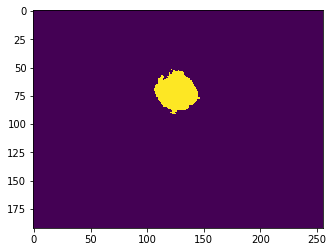

0.7415723360501802  step number is  7300  batch_size is  16
Currently on step 7400
the time is  868.3147840000001 

Avg Jacc is:


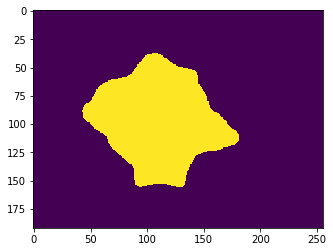

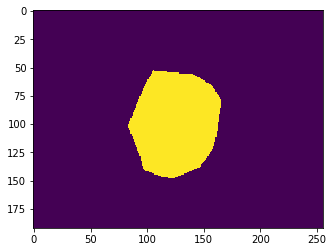

0.76857423048753  step number is  7400  batch_size is  16
Currently on step 7500
the time is  880.0607569999997 

Avg Jacc is:


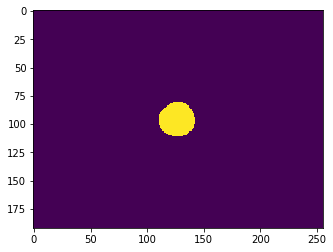

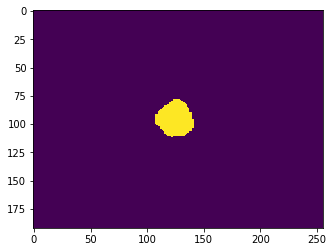

0.7619796752929687  step number is  7500  batch_size is  16
Currently on step 7600
the time is  891.7397249999999 

Avg Jacc is:


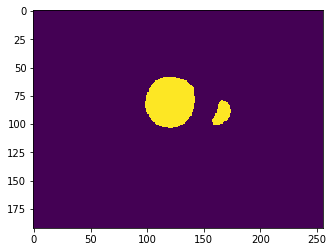

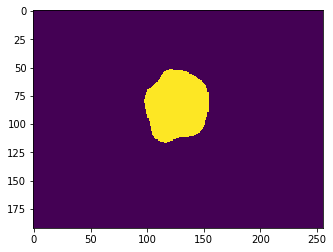

0.7677825927734375  step number is  7600  batch_size is  16
Currently on step 7700
the time is  903.4417640000001 

Avg Jacc is:


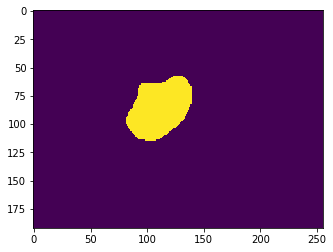

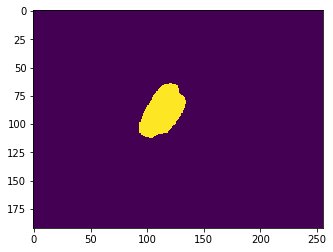

0.7682759211613581  step number is  7700  batch_size is  16
Currently on step 7800
the time is  915.2833049999999 

Avg Jacc is:


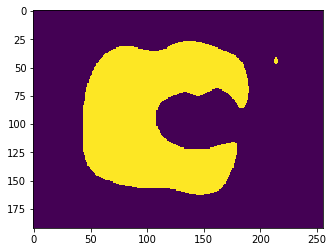

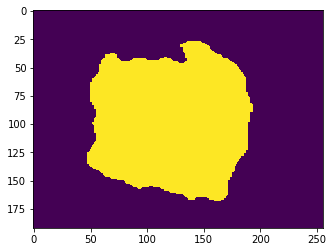

0.7569509652944711  step number is  7800  batch_size is  16
Currently on step 7900
the time is  927.122914 

Avg Jacc is:


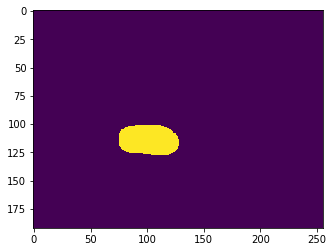

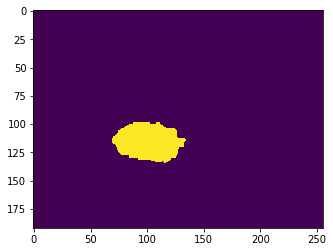

0.7688767653245192  step number is  7900  batch_size is  16
Currently on step 8000
the time is  938.8503270000001 

Avg Jacc is:


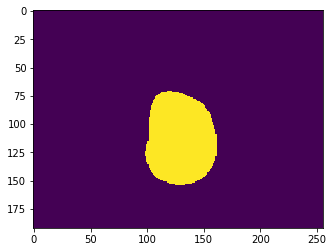

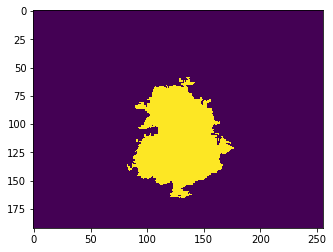

0.7418998131385216  step number is  8000  batch_size is  16
Currently on step 8100
the time is  950.6344039999999 

Avg Jacc is:


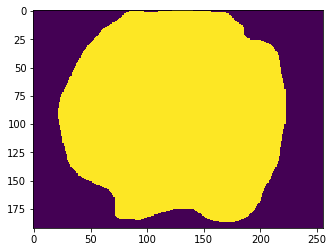

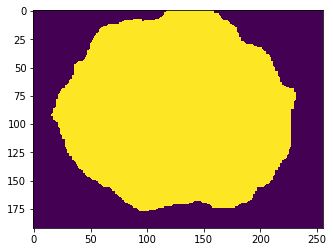

0.7642054631159856  step number is  8100  batch_size is  16
Currently on step 8200
the time is  962.4081929999998 

Avg Jacc is:


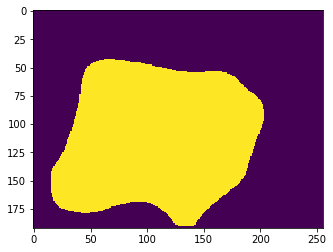

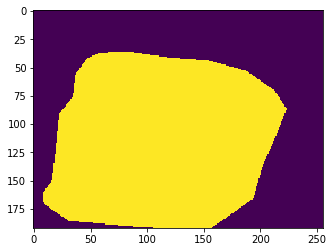

0.7806101285494291  step number is  8200  batch_size is  16
Currently on step 8300
the time is  974.1533559999998 

Avg Jacc is:


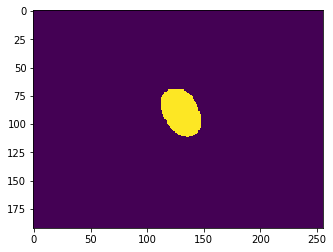

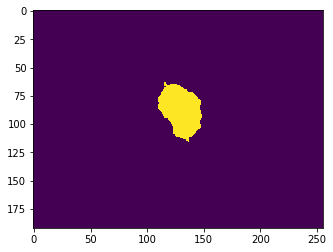

0.7656200702373798  step number is  8300  batch_size is  16
Currently on step 8400
the time is  986.2025089999997 

Avg Jacc is:


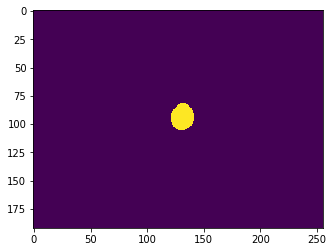

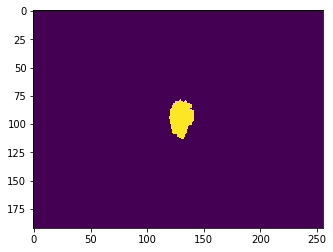

0.7816578791691706  step number is  8400  batch_size is  16
Currently on step 8500
the time is  997.9248419999999 

Avg Jacc is:


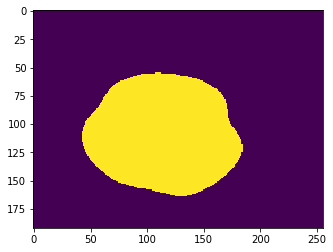

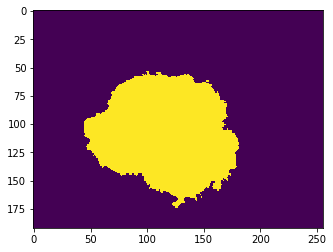

0.7878644503079928  step number is  8500  batch_size is  16
Currently on step 8600
the time is  1009.7815390000001 

Avg Jacc is:


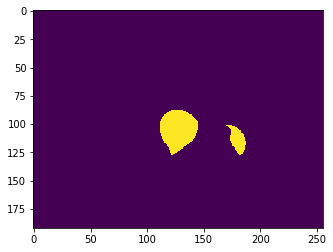

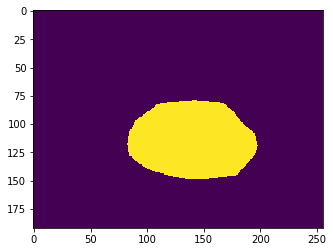

0.7847781841571514  step number is  8600  batch_size is  16
Currently on step 8700
the time is  1021.544343 

Avg Jacc is:


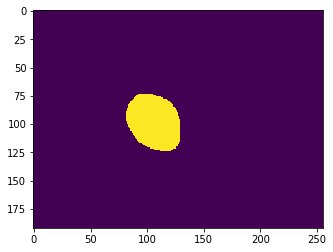

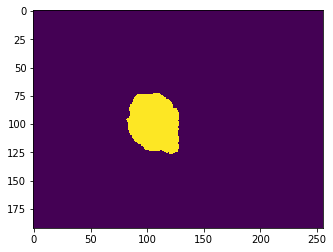

0.7637717026930589  step number is  8700  batch_size is  16
Currently on step 8800
the time is  1033.3341810000002 

Avg Jacc is:


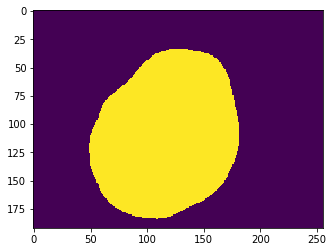

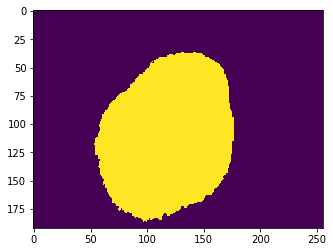

0.7800548260028546  step number is  8800  batch_size is  16
Currently on step 8900
the time is  1045.050682 

Avg Jacc is:


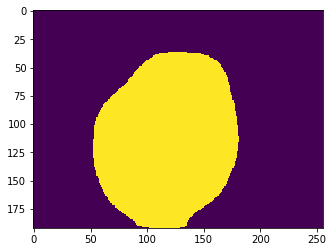

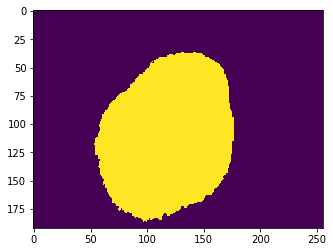

0.7653671264648437  step number is  8900  batch_size is  16
Currently on step 9000
the time is  1056.8392319999998 

Avg Jacc is:


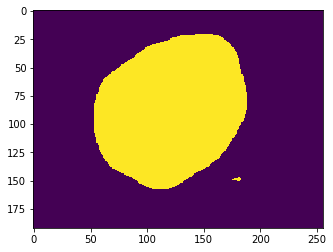

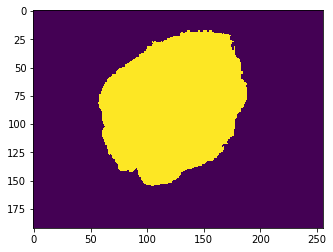

0.749559079683744  step number is  9000  batch_size is  16
Currently on step 9100
the time is  1068.590448 

Avg Jacc is:


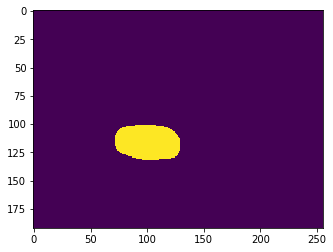

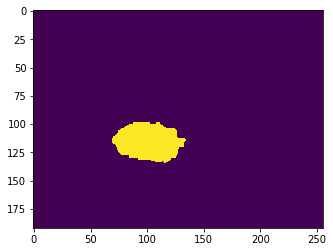

0.7858900803786057  step number is  9100  batch_size is  16
Currently on step 9200
the time is  1080.4065460000002 

Avg Jacc is:


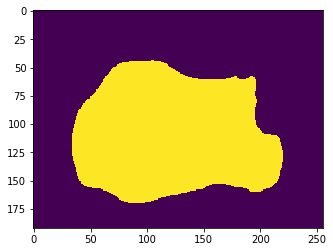

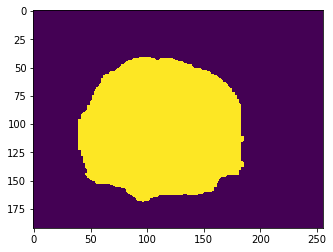

0.7812957176795372  step number is  9200  batch_size is  16
Currently on step 9300
the time is  1092.1493679999999 

Avg Jacc is:


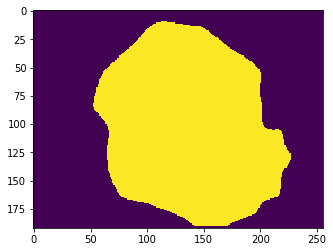

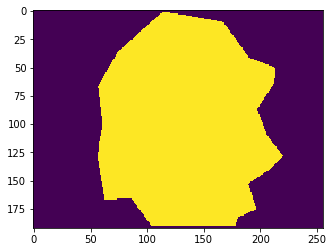

0.7814875676081731  step number is  9300  batch_size is  16
Currently on step 9400
the time is  1103.9785510000002 

Avg Jacc is:


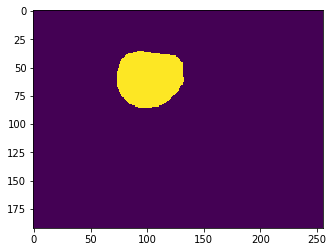

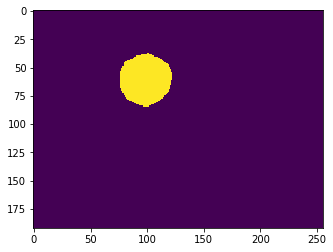

0.7674051138070913  step number is  9400  batch_size is  16
Currently on step 9500
the time is  1115.7127540000001 

Avg Jacc is:


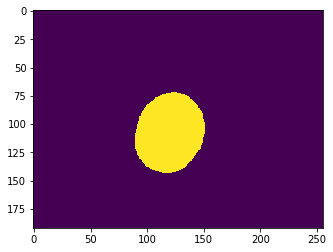

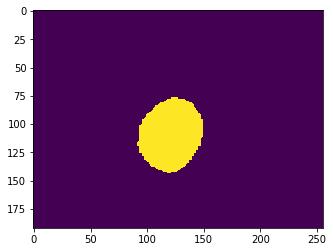

0.7772673973670372  step number is  9500  batch_size is  16
Currently on step 9600
the time is  1127.5138940000002 

Avg Jacc is:


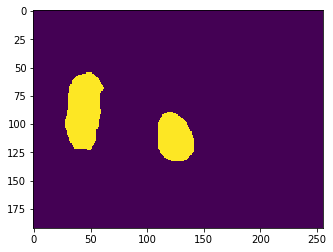

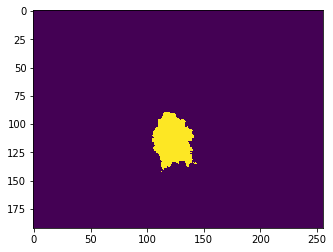

0.7644774216871996  step number is  9600  batch_size is  16
Currently on step 9700
the time is  1139.245355 

Avg Jacc is:


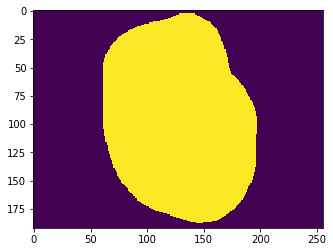

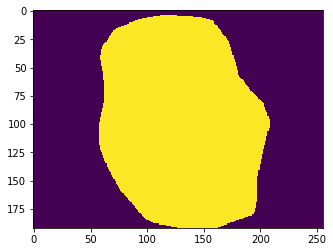

0.753219721867488  step number is  9700  batch_size is  16
Currently on step 9800
the time is  1151.106014 

Avg Jacc is:


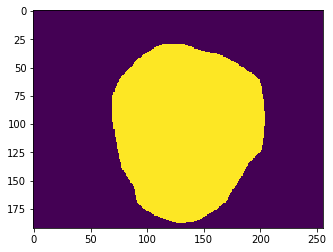

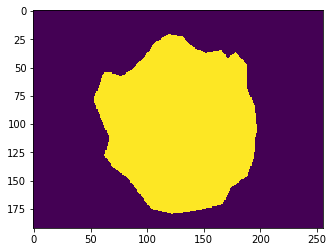

0.7740322406475361  step number is  9800  batch_size is  16
Currently on step 9900
the time is  1162.90049 

Avg Jacc is:


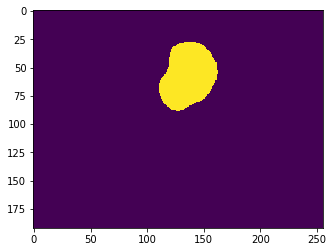

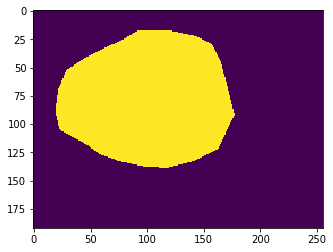

0.7805026714618389  step number is  9900  batch_size is  16
Currently on step 10000
the time is  1174.60504 

Avg Jacc is:


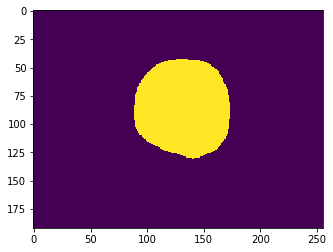

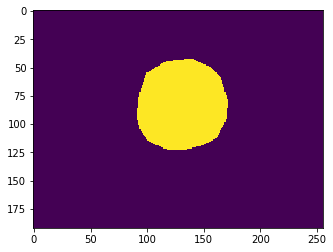

0.7687748835637019  step number is  10000  batch_size is  16
Currently on step 10100
the time is  1186.507686 

Avg Jacc is:


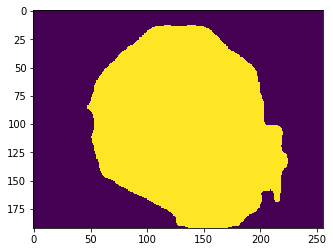

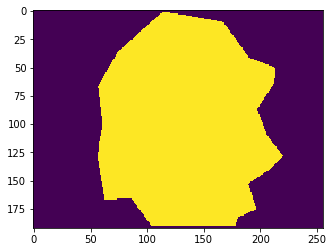

0.7686954791729267  step number is  10100  batch_size is  16
Currently on step 10200
the time is  1198.1824659999997 

Avg Jacc is:


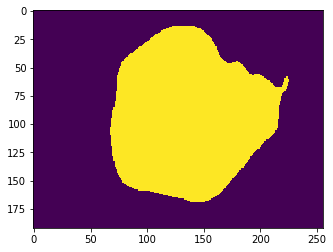

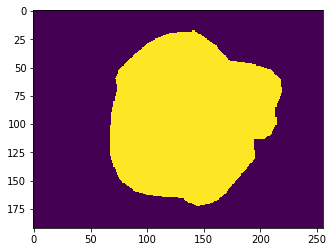

0.7885749816894532  step number is  10200  batch_size is  16
Currently on step 10300
the time is  1209.9115649999999 

Avg Jacc is:


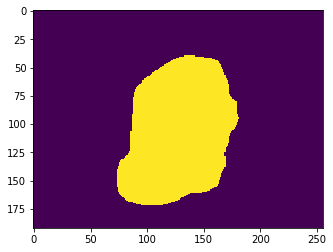

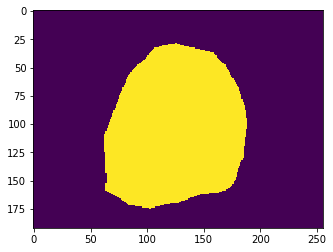

0.7750012911283053  step number is  10300  batch_size is  16
Currently on step 10400
the time is  1221.6290840000001 

Avg Jacc is:


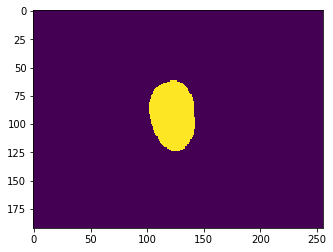

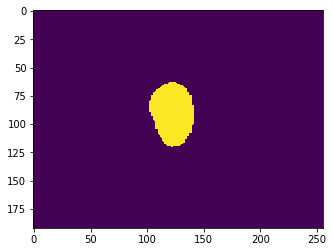

0.7906028160682091  step number is  10400  batch_size is  16


In [229]:
steps = 10500
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [230]:
J_out[1].shape

(130, 192, 256)

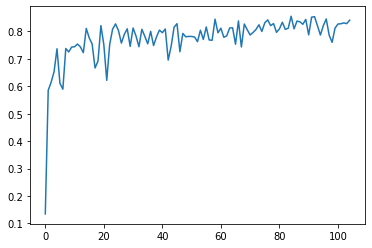

In [231]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

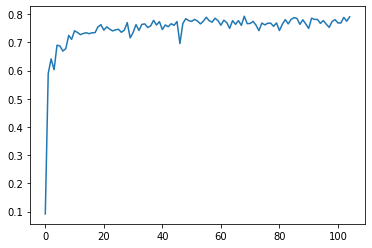

In [232]:

plt.plot(j_test)

(array([ 2.,  3.,  3.,  1.,  6.,  7.,  7., 16., 39., 46.]),
 array([0.27297276, 0.3391127 , 0.40525264, 0.47139257, 0.5375325 ,
        0.60367244, 0.6698124 , 0.7359523 , 0.80209225, 0.8682322 ,
        0.9343721 ], dtype=float32),
 <a list of 10 Patch objects>)

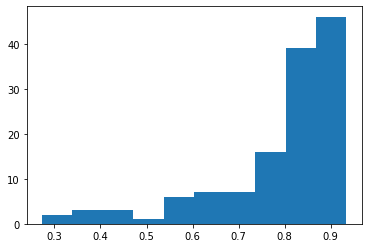

In [233]:
plt.hist(J_out[0])

(array([1., 1., 0., 0., 1., 2., 0., 2., 5., 4.]),
 array([0.6658824 , 0.6908281 , 0.7157738 , 0.7407195 , 0.7656652 ,
        0.7906109 , 0.8155566 , 0.84050226, 0.86544794, 0.8903937 ,
        0.91533935], dtype=float32),
 <a list of 10 Patch objects>)

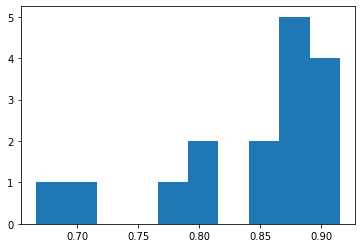

In [234]:
plt.hist(J_out_t[0])

In [235]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

0.15384615384615385

## Great Job!

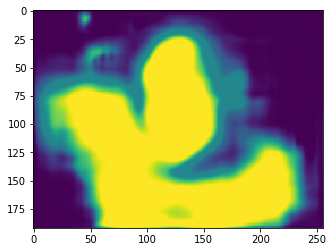

In [236]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [237]:
pigs.shape

(28, 192, 256, 3)

In [238]:
pred_pigment[0].shape

(28, 192, 256)

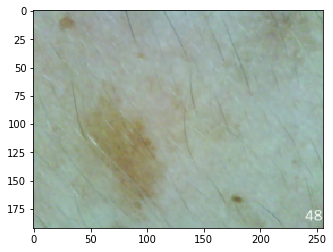

In [239]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
def visual_progress():

  mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
  for i in range(28):
    mask[:,:,0] = np.around(pred_pigment[0][i])
    mask[:,:,1] = np.around(pred_pigment[0][i])
    mask[:,:,2] = np.around(pred_pigment[0][i])


    image = pigs[i]
    notmask = 1- mask
    image2 = image*mask
    image1 = image*(1- mask)

    image2_avgr = np.average(image2[:,:,0], weights = mask[:,:,0])
    image2_avgg = np.average(image2[:,:,1], weights = mask[:,:,1]) 
    image2_avgb = np.average(image2[:,:,2], weights = mask[:,:,2])

    image1_avgr = np.average(image1[:,:,0], weights = notmask[:,:,0])
    image1_avgg = np.average(image1[:,:,1], weights = notmask[:,:,1]) 
    image1_avgb = np.average(image1[:,:,2], weights = notmask[:,:,2])

    image2_avg = np.zeros(image2.shape)
    image1_avg = np.zeros(image1.shape)
    image2_avg[:,:,0] = image2_avgr
    image2_avg[:,:,1] = image2_avgg
    image2_avg[:,:,2] = image2_avgb

    image1_avg[:,:,0] = image1_avgr
    image1_avg[:,:,1] = image1_avgg
    image1_avg[:,:,2] = image1_avgb
#mask = 1-mask
#mask = mask.astype(int)
    plt.imshow(image2_avg)
    plt.show()
  
#image[mask] = 0

    plt.imshow(image1_avg)
    plt.show()

    plt.imshow(image2)
    plt.show()
    plt.imshow(image1)
    plt.show()

    print("next day..\n")
  return()

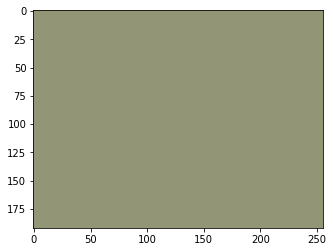

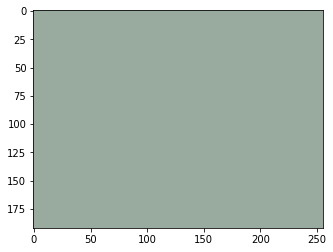

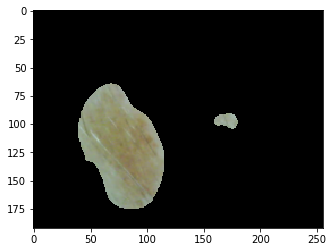

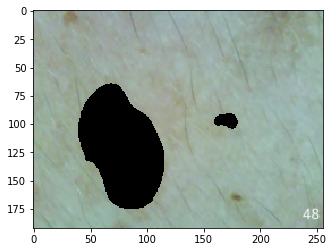

next day..



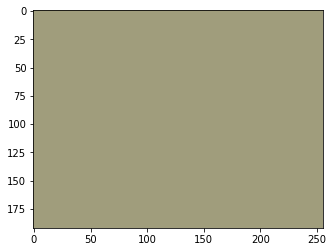

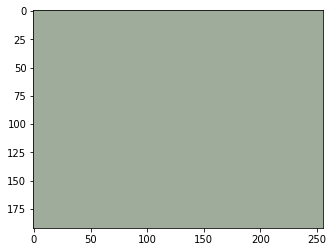

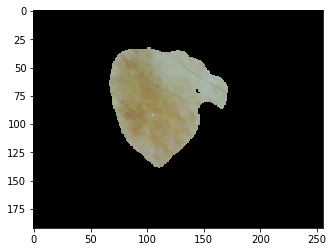

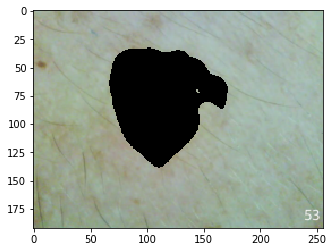

next day..



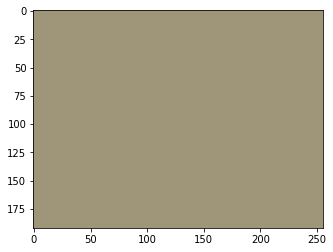

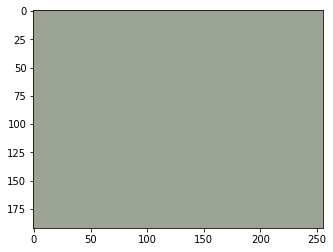

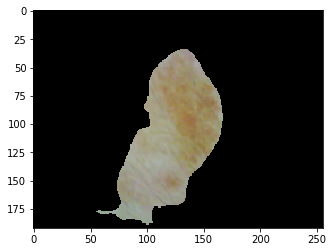

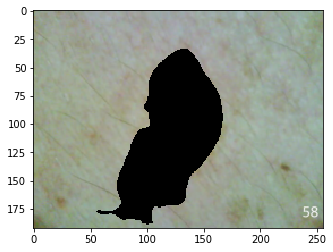

next day..



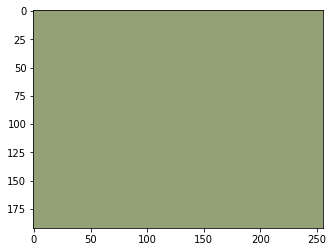

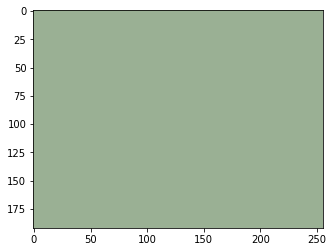

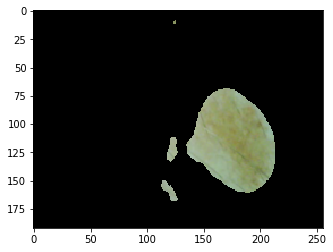

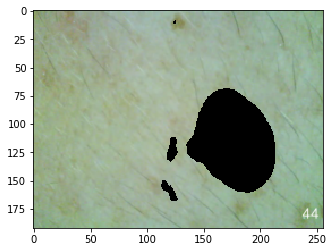

next day..



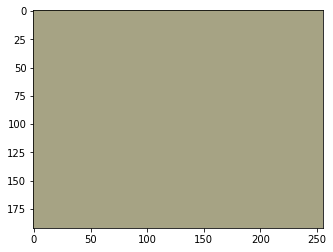

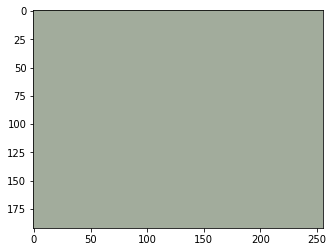

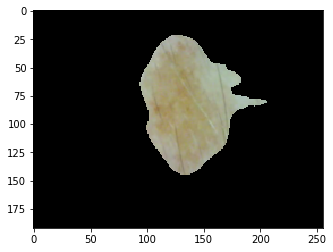

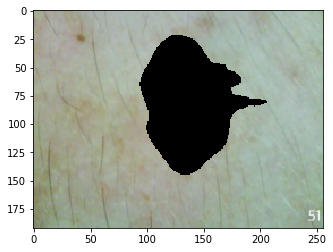

next day..



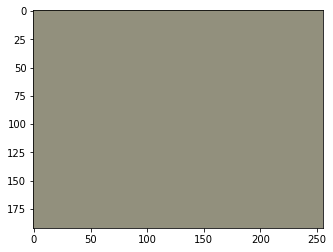

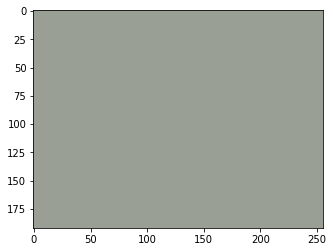

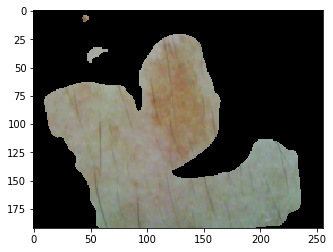

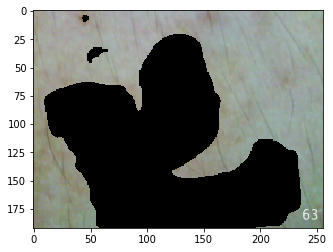

next day..



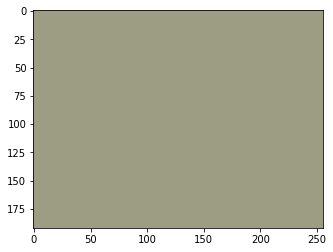

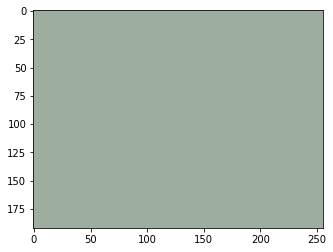

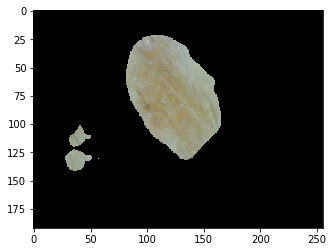

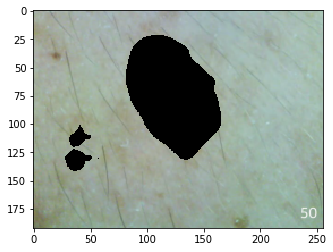

next day..



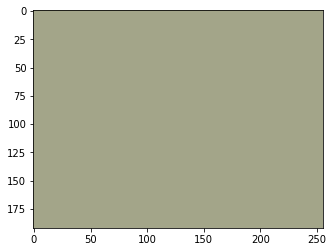

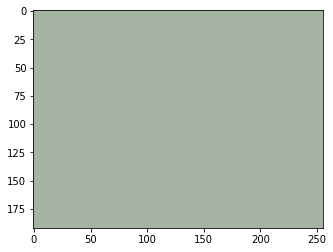

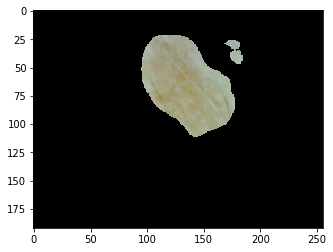

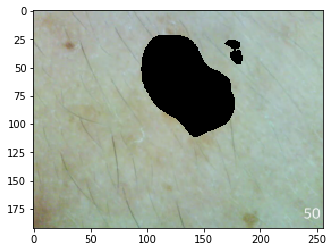

next day..



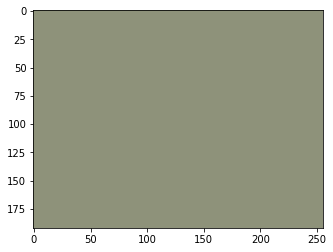

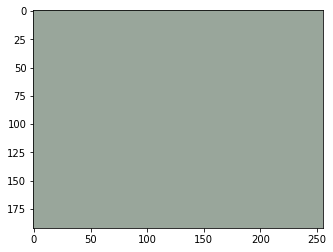

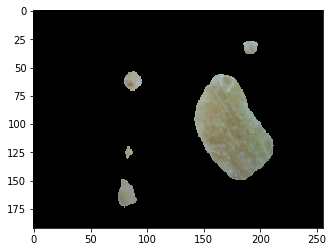

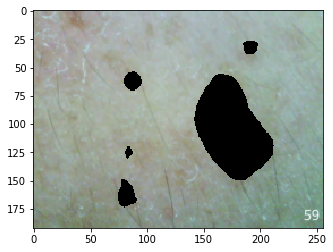

next day..



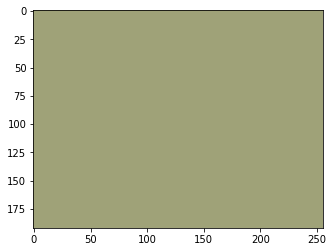

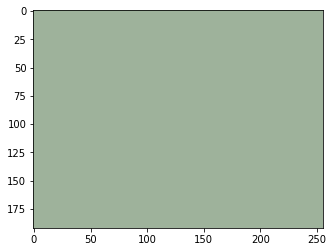

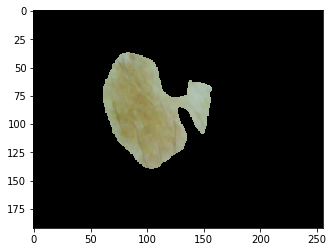

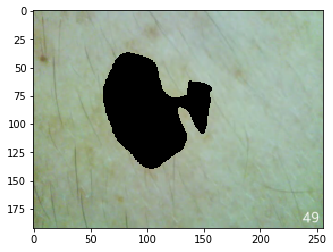

next day..



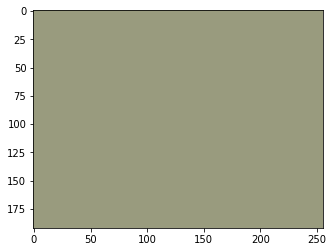

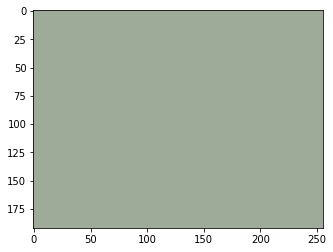

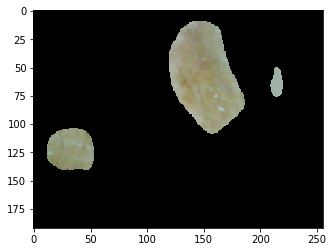

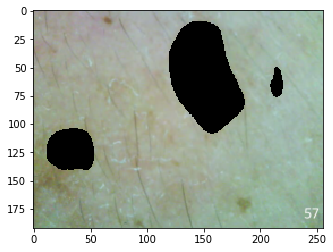

next day..



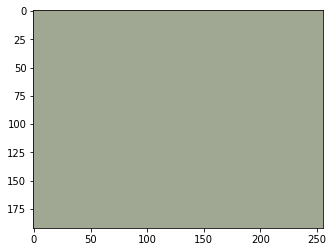

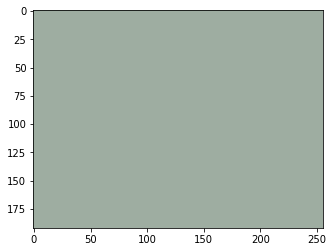

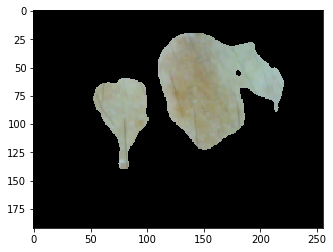

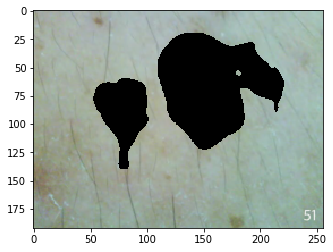

next day..



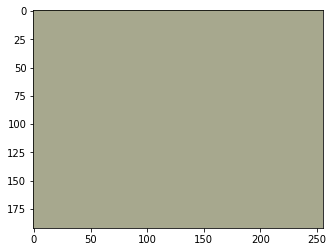

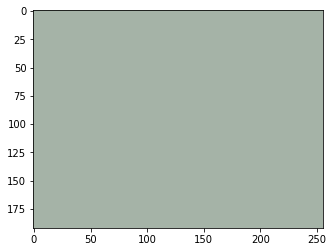

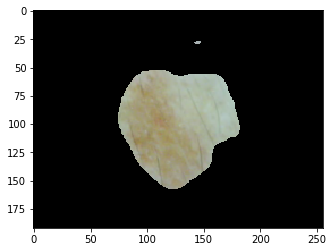

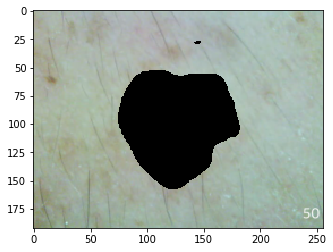

next day..



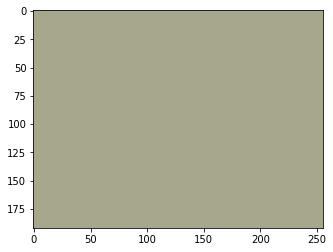

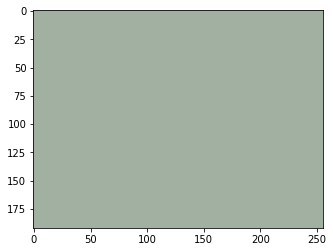

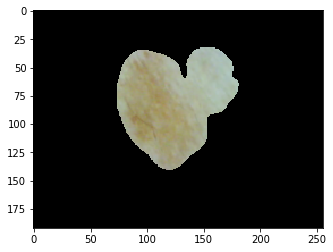

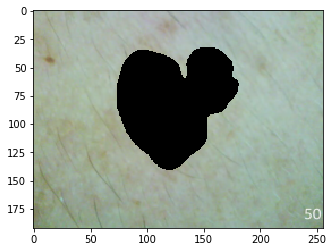

next day..



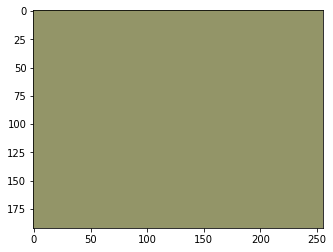

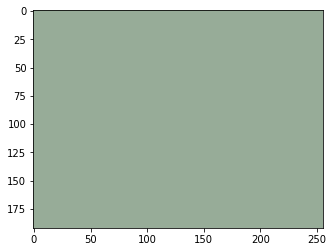

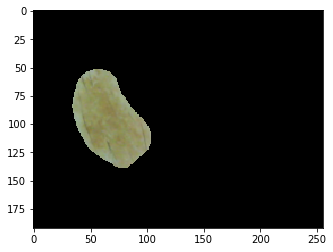

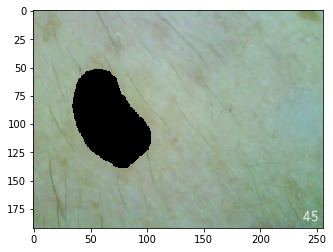

next day..



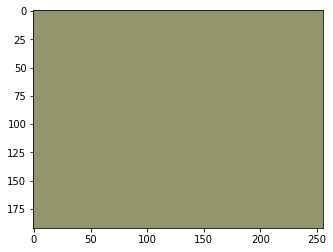

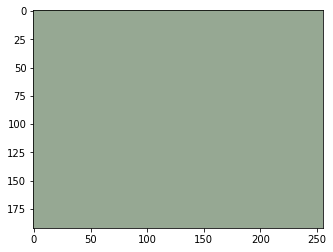

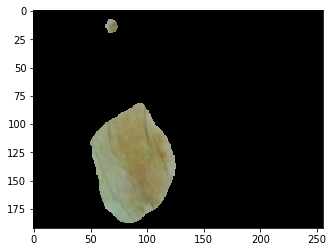

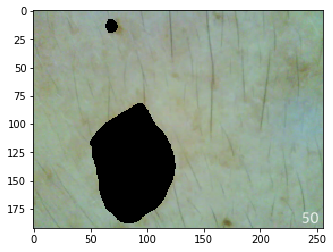

next day..



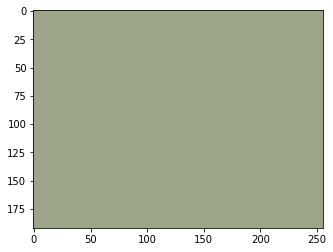

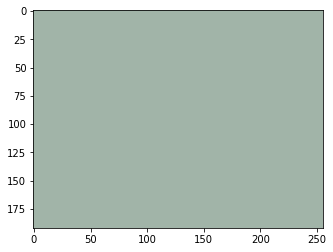

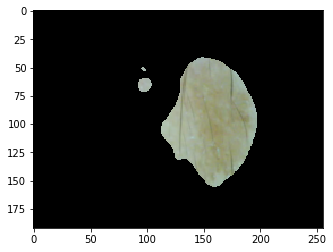

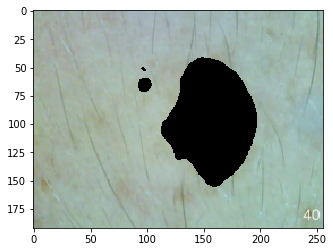

next day..



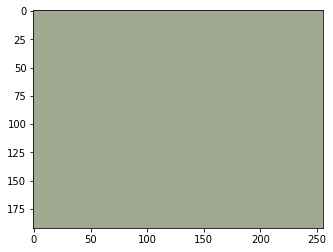

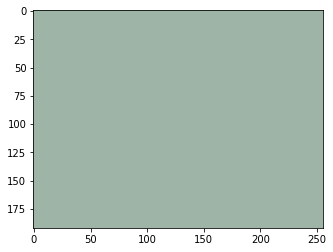

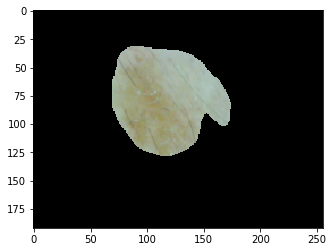

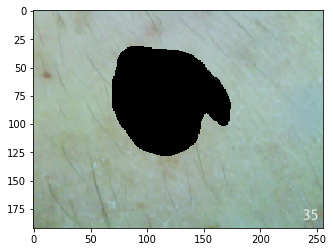

next day..



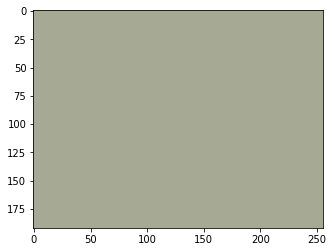

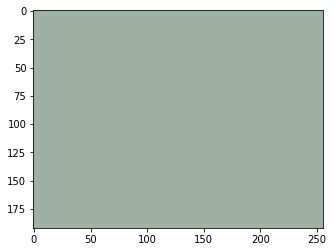

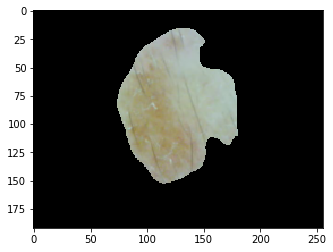

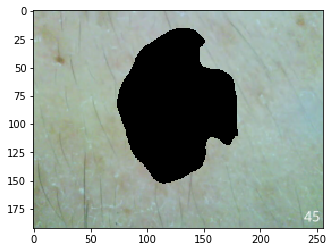

next day..



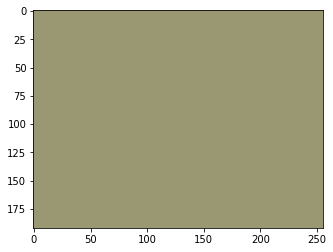

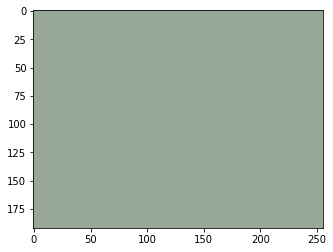

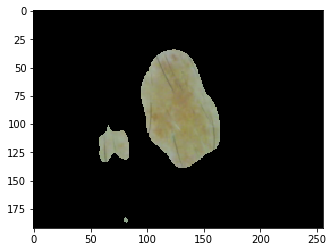

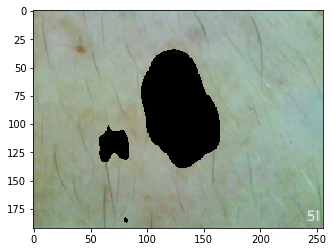

next day..



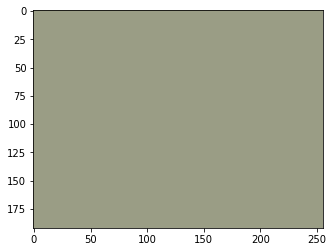

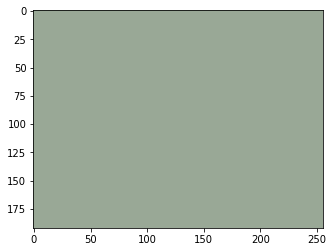

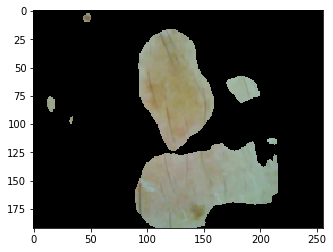

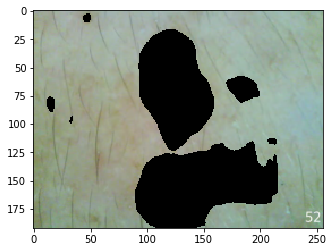

next day..



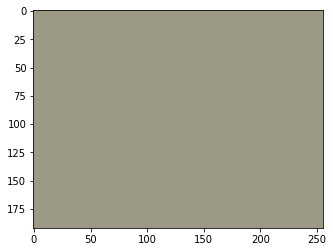

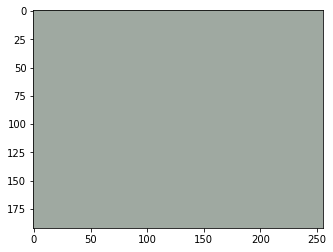

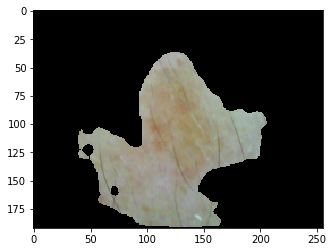

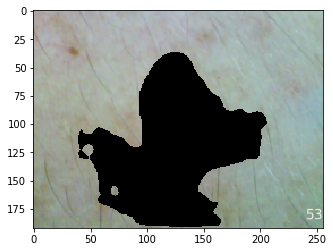

next day..



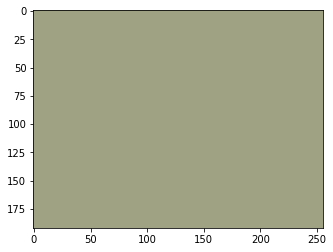

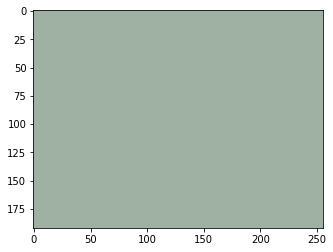

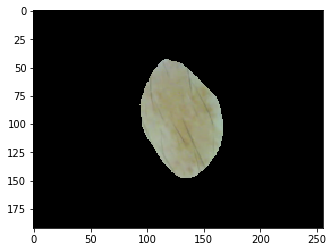

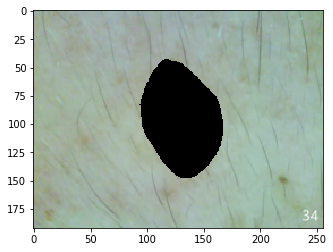

next day..



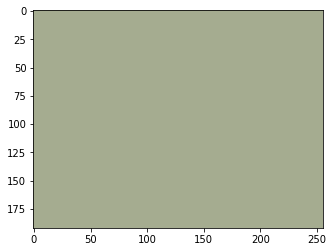

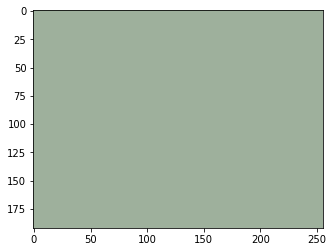

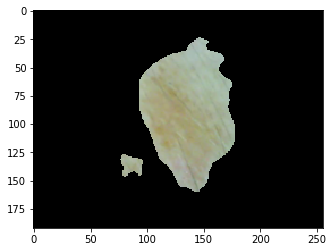

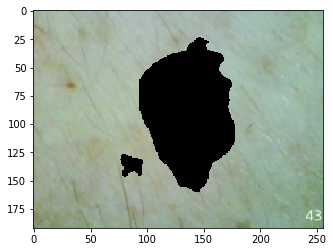

next day..



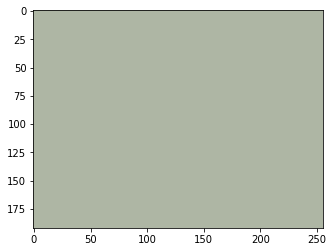

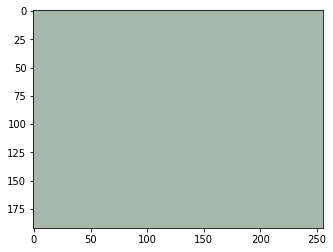

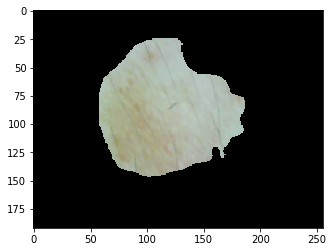

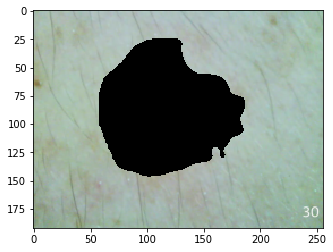

next day..



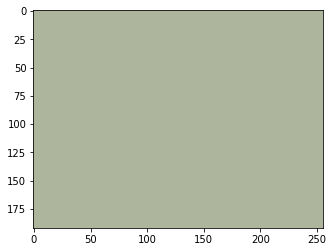

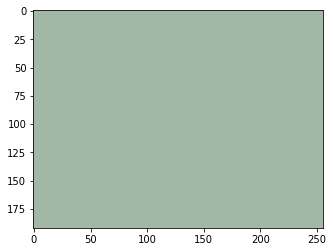

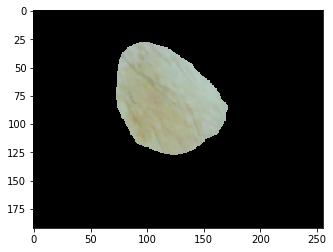

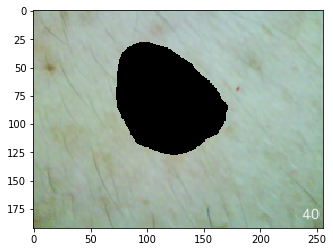

next day..



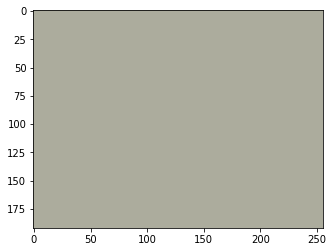

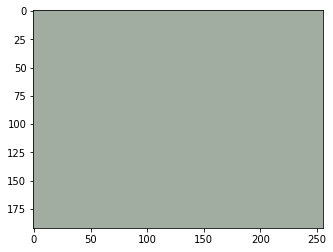

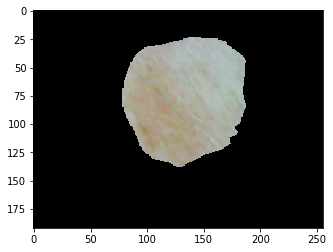

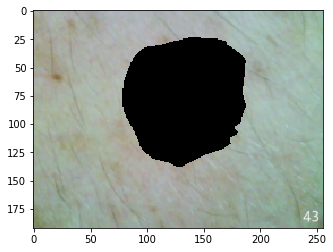

next day..



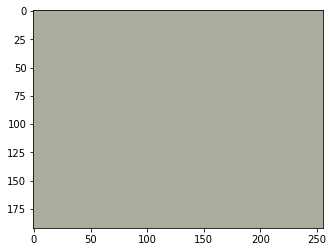

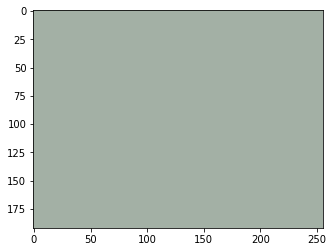

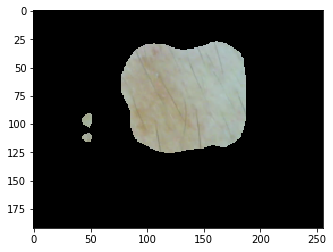

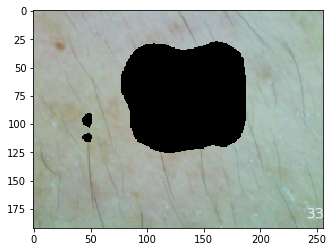

next day..



()

In [241]:
visual_progress()

In [0]:
def measure_progress(pigs,masks):  ##changed from blue to blue - red
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1) - imagen[:,:,0].reshape(-1) 
        blue_pig = imagep[:,:,2].reshape(-1) - imagep[:,:,0].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,0].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,0].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [244]:
J_out[1].shape

(130, 192, 256)

In [245]:
pigmented

array([-22.87143969, -32.33224918, -30.9970347 , -22.70976667,
       -28.66078128, -18.01260418, -19.11411334, -21.23275517,
       -12.49341   , -32.08148661, -20.75612992, -12.56304267,
       -22.07250109, -25.28855034, -35.26642076, -33.41248693,
       -14.29383737, -15.08019071, -17.58857299, -27.34726054,
       -17.31575808, -17.67283317, -22.71339368, -18.15250881,
        -9.63961703, -14.83489833, -13.73170909, -10.84496047])

In [246]:
normal

array([ 6.26636661, -3.0141393 , -6.14860553, -5.73189698, -6.21423935,
       -2.00254744,  3.22825746, -2.16798381,  2.07267122, -3.33878414,
       -4.18405239,  3.02052547,  1.63393142, -0.95445996,  1.51908314,
       -2.65750391,  7.83467103,  8.90505076,  5.04116981, -1.59946976,
       -2.79930124,  2.53599573,  4.26185549, -1.39813727,  6.60401666,
        3.40959612,  0.43784118,  2.10092326])

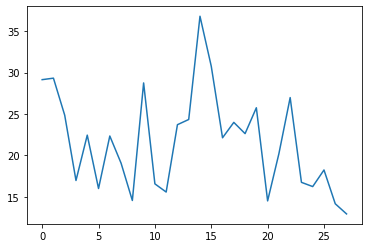

In [247]:
plt.plot(normal - pigmented)

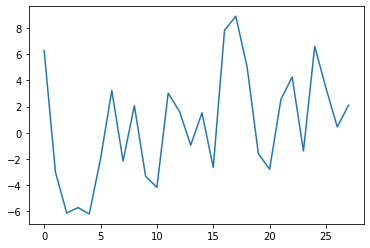

In [248]:
plt.plot(normal)

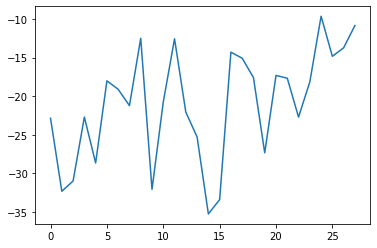

In [249]:
plt.plot(pigmented)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


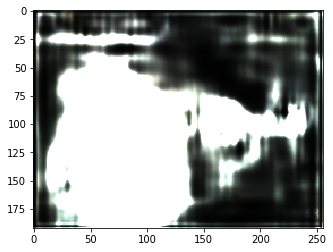

In [250]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


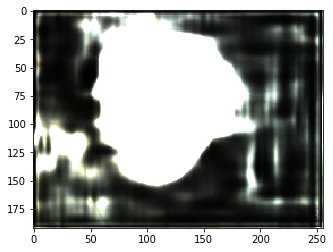

In [251]:
plt.imshow(imagesp[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


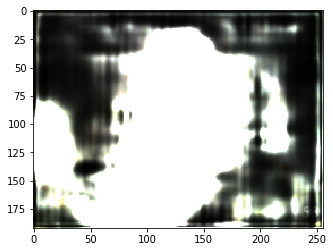

In [252]:
plt.imshow(imagesp[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


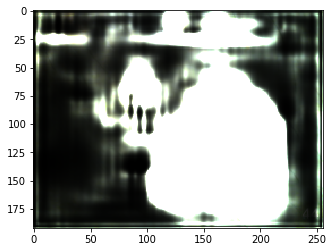

In [253]:
plt.imshow(imagesp[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


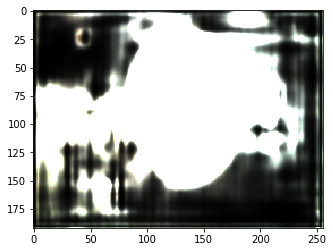

In [254]:
plt.imshow(imagesp[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


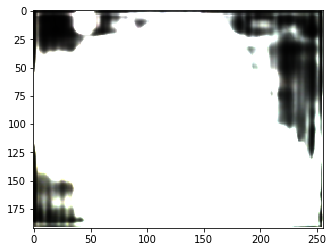

In [255]:
plt.imshow(imagesp[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


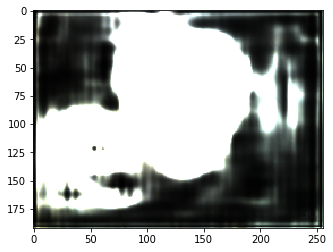

In [256]:
plt.imshow(imagesp[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


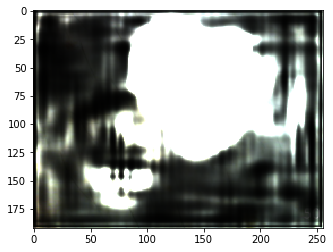

In [257]:
plt.imshow(imagesp[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


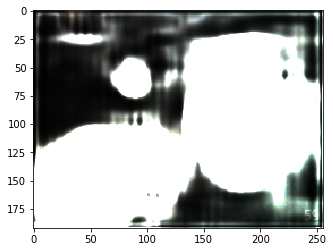

In [258]:
plt.imshow(imagesp[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


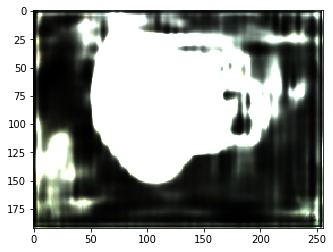

In [259]:
plt.imshow(imagesp[9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


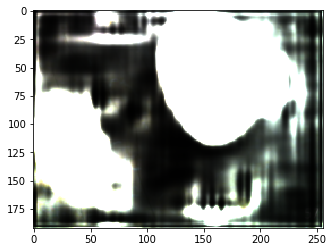

In [260]:
plt.imshow(imagesp[10])

In [261]:
pigmented[0]

-22.871439690032197

In [262]:
pigmented[10]

-20.756129920103874

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


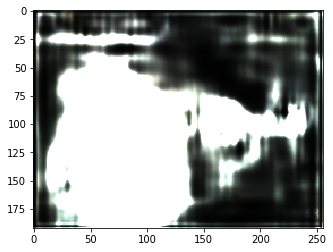

In [263]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


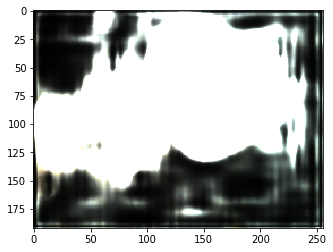

In [264]:
plt.imshow(imagesp[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


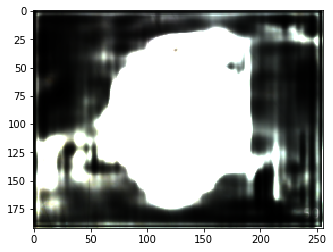

In [265]:
plt.imshow(imagesp[12])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


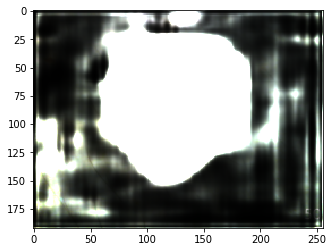

In [266]:
plt.imshow(imagesp[13])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


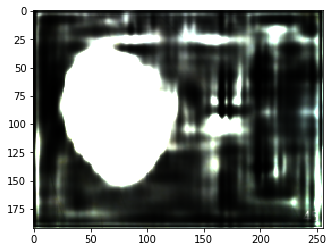

In [267]:
plt.imshow(imagesp[14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


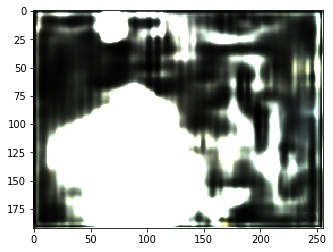

In [268]:
plt.imshow(imagesp[15])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


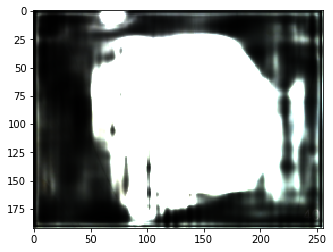

In [269]:
plt.imshow(imagesp[16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


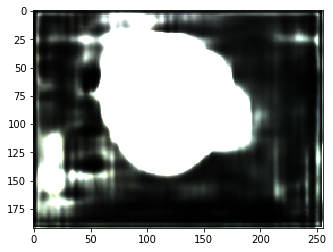

In [270]:
plt.imshow(imagesp[17])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


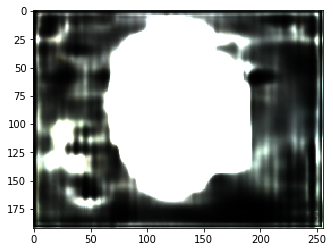

In [271]:
plt.imshow(imagesp[18])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


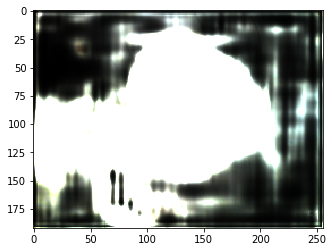

In [272]:
plt.imshow(imagesp[19])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


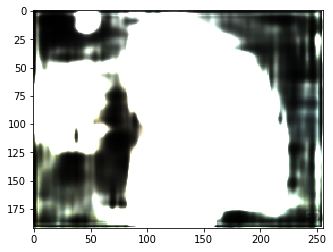

In [273]:
plt.imshow(imagesp[20])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


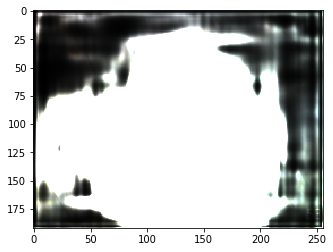

In [274]:
plt.imshow(imagesp[21])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


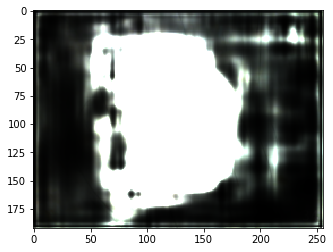

In [275]:
plt.imshow(imagesp[22])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


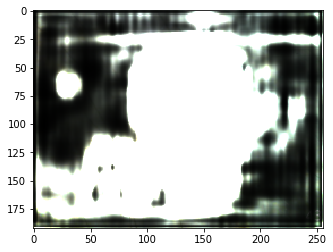

In [276]:
plt.imshow(imagesp[23])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


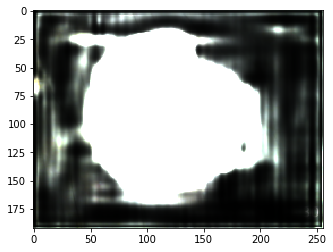

In [277]:
plt.imshow(imagesp[24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


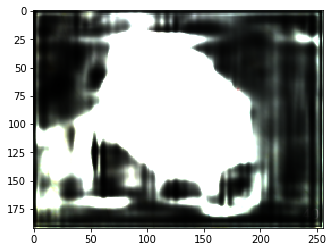

In [278]:
plt.imshow(imagesp[25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


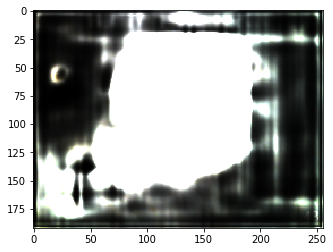

In [279]:
plt.imshow(imagesp[26])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


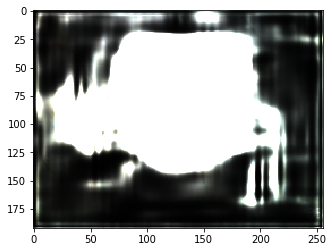

In [280]:
plt.imshow(imagesp[27])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


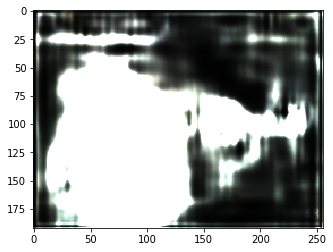

In [281]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

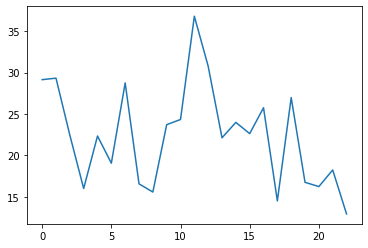

In [284]:
plt.plot(test)

In [285]:
filenames

['ISIC_0000000r_segmentation.png',
 'ISIC_0000000f_segmentation.png',
 'ISIC_0000000_segmentation.png',
 'ISIC_0000001f_segmentation.png',
 'ISIC_0000008r_segmentation.png',
 'ISIC_0000008_segmentation.png',
 'ISIC_0000007_segmentation.png',
 'ISIC_0000001_segmentation.png',
 'ISIC_0000007r_segmentation.png',
 'ISIC_0000008f_segmentation.png',
 'ISIC_0000001r_segmentation.png',
 'ISIC_0000007f_segmentation.png',
 'ISIC_0000016r_segmentation.png',
 'ISIC_0000016f_segmentation.png',
 'ISIC_0000016_segmentation.png',
 'ISIC_0000024f_segmentation.png',
 'ISIC_0000024_segmentation.png',
 'ISIC_0000025f_segmentation.png',
 'ISIC_0000024r_segmentation.png',
 'ISIC_0000029r_segmentation.png',
 'ISIC_0000029_segmentation.png',
 'ISIC_0000028r_segmentation.png',
 'ISIC_0000025r_segmentation.png',
 'ISIC_0000025_segmentation.png',
 'ISIC_0000029f_segmentation.png',
 'ISIC_0000028f_segmentation.png',
 'ISIC_0000028_segmentation.png',
 'ISIC_0000031r_segmentation.png',
 'ISIC_0000031f_segmentation.

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

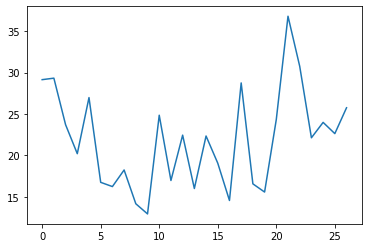

In [288]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [290]:
normal.shape

(27,)

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

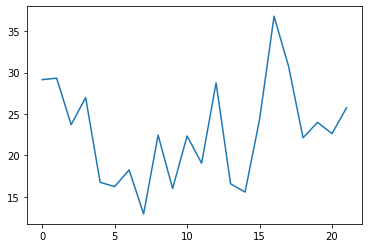

In [294]:
plt.plot(normal-pigmented)

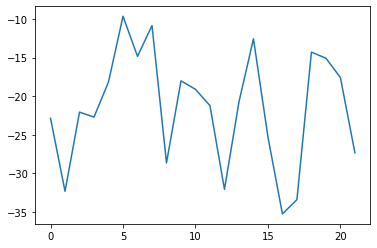

In [295]:
plt.plot(pigmented)

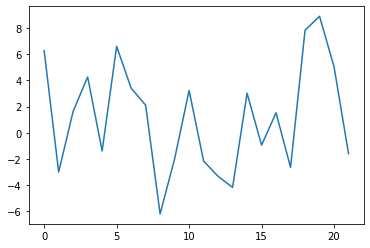

In [296]:
plt.plot(normal)

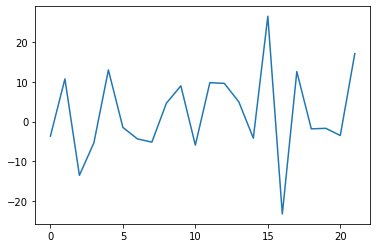

In [297]:
plt.plot(pigmented/normal)

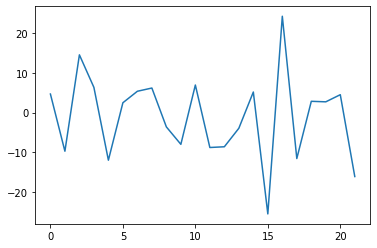

In [298]:
plt.plot((normal - pigmented)/normal)

In [299]:
new_files_names

array(['ISIC_0000000r_segmentation.png', 'ISIC_0000000f_segmentation.png',
       'ISIC_0000000_segmentation.png', 'ISIC_0000008r_segmentation.png',
       'ISIC_0000008_segmentation.png', 'ISIC_0000007_segmentation.png',
       'ISIC_0000001_segmentation.png', 'ISIC_0000008f_segmentation.png',
       'ISIC_0000016r_segmentation.png', 'ISIC_0000016f_segmentation.png',
       'ISIC_0000016_segmentation.png', 'ISIC_0000024f_segmentation.png',
       'ISIC_0000025f_segmentation.png', 'ISIC_0000024r_segmentation.png',
       'ISIC_0000029r_segmentation.png', 'ISIC_0000029_segmentation.png',
       'ISIC_0000028r_segmentation.png', 'ISIC_0000025r_segmentation.png',
       'ISIC_0000025_segmentation.png', 'ISIC_0000029f_segmentation.png',
       'ISIC_0000028f_segmentation.png', 'ISIC_0000028_segmentation.png'],
      dtype='<U30')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


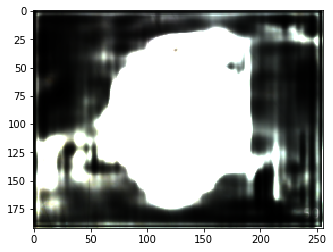

In [300]:
plt.imshow(imagesp[12])